In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import sqlalchemy
from urllib.parse import quote_plus

# Reading Datasets

In [93]:
# Read the DataSets
file_path_1 = 'D:\Projects\ECommerce\Data Files\data\AmazonSaleReport.csv'
file_path_2 = 'D:\Projects\ECommerce\Data Files\data\InternationalSaleReport.csv'
file_path_3 = 'D:\Projects\ECommerce\Data Files\data\SaleReport.csv'
file_path_4 = 'D:\Projects\ECommerce\Data Files\data\May-2022.csv'
file_path_5 = 'D:\Projects\ECommerce\Data Files\data\PLMarch2021.csv'

amazonSaleReport = pd.read_csv(file_path_1)
internationalSaleReport = pd.read_csv(file_path_2)
saleReport = pd.read_csv(file_path_3)
may2022 = pd.read_csv(file_path_4)
pLMarch2021 = pd.read_csv(file_path_5)

C:\Users\Zahra\AppData\Local\Temp\ipykernel_5696\131267807.py:8: DtypeWarning: Columns (21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  amazonSaleReport = pd.read_csv(file_path_1)


# Identifying AND Cleaning AmazonSaleReport File

In [94]:
amazonSaleReport.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,1.0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,2.0,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,3.0,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,4.0,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,5.0,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [95]:
amazonSaleReport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  float64
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  float64
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [96]:
amazonSaleReport.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64488.000000,0.904431,648.555507,463966.236509
std,37232.019822,0.313354,281.221603,191476.764941
min,1.000000,0.000000,0.000000,110001.000000
25%,32244.500000,1.000000,449.000000,382421.000000
50%,64488.000000,1.000000,605.000000,500033.000000
75%,96731.500000,1.000000,788.000000,600024.000000
max,128975.000000,15.000000,5584.000000,989898.000000


In [97]:
cleaned_amazonSaleReport = amazonSaleReport.drop(columns=["index","Unnamed: 22"])

In [98]:
#Change Column Names For Make them Easy To Use
cleaned_amazonSaleReport = cleaned_amazonSaleReport.rename(columns={"Order ID" : "order_id" ,
                                 "Date" : "date",
                                 "Status" : "status",
                                 "Fulfilment" : "fulfilment",      
                                 "Sales Channel " : "sales_channel",
                                 "ship-service-level" : "ship_service_level",
                                 "Style" : "style" ,
                                 "SKU" : "sku" ,
                                 "Category" : "category" , 
                                 "Size" : "size" ,
                                 "ASIN" : "asin" ,
                                 "Courier Status" : "courier_status" ,
                                 "Qty" : "qty" ,
                                 "Amount" : "amount",
                                 "ship-city" :"ship_city",
                                 "ship-state" : "ship_state",
                                 "ship-postal-code" : "ship_postal_code",
                                 "ship-country" : "ship_country",
                                 "promotion-ids" :"promotion_ids",
                                 "B2B" : "b2b" ,
                                 "fulfilled-by" : "fulfilled_by"                      
                                })
cleaned_amazonSaleReport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            128975 non-null  object 
 1   date                128975 non-null  object 
 2   status              128975 non-null  object 
 3   fulfilment          128975 non-null  object 
 4   sales_channel       128975 non-null  object 
 5   ship_service_level  128975 non-null  object 
 6   style               128975 non-null  object 
 7   sku                 128975 non-null  object 
 8   category            128975 non-null  object 
 9   size                128975 non-null  object 
 10  asin                128975 non-null  object 
 11  courier_status      122103 non-null  object 
 12  qty                 128975 non-null  float64
 13  currency            121180 non-null  object 
 14  amount              121180 non-null  float64
 15  ship_city           128942 non-nul

# Find Unique Values In Columns

In [99]:
target_unique_columns = ['status', 'fulfilment', 'sales_channel', 'ship_service_level', 'category', 'size' , 'courier_status', 
                    'currency','ship_city','ship_state' ,'ship_country' , 'fulfilled_by']

for col in target_unique_columns:
    if col in cleaned_amazonSaleReport.columns:
        print(f"Column: {col}")
        print(f"Number of Unique Values: {cleaned_amazonSaleReport[col].nunique()}")
        print(f"Unique Values: {cleaned_amazonSaleReport[col].unique()}")
        print('_' * 100)


Column: status
Number of Unique Values: 13
Unique Values: ['Cancelled' 'Shipped - Delivered to Buyer' 'Shipped'
 'Shipped - Returned to Seller' 'Shipped - Rejected by Buyer'
 'Shipped - Lost in Transit' 'Shipped - Out for Delivery'
 'Shipped - Returning to Seller' 'Shipped - Picked Up' 'Pending'
 'Pending - Waiting for Pick Up' 'Shipped - Damaged' 'Shipping' nan]
____________________________________________________________________________________________________
Column: fulfilment
Number of Unique Values: 2
Unique Values: ['Merchant' 'Amazon' nan]
____________________________________________________________________________________________________
Column: sales_channel
Number of Unique Values: 2
Unique Values: ['Amazon.in' 'Non-Amazon' nan]
____________________________________________________________________________________________________
Column: ship_service_level
Number of Unique Values: 2
Unique Values: ['Standard' 'Expedited' nan]
___________________________________________________

In [100]:
cleaned_amazonSaleReport.isnull().sum()

order_id                  1
date                      1
status                    1
fulfilment                1
sales_channel             1
ship_service_level        1
style                     1
sku                       1
category                  1
size                      1
asin                      1
courier_status         6873
qty                       1
currency               7796
amount                 7796
ship_city                34
ship_state               34
ship_postal_code         34
ship_country             34
promotion_ids         49154
b2b                       1
fulfilled_by          89699
dtype: int64

In [101]:
#Calculate Percentage of missing data in those fields which are important for analysis
columns_of_interest = ['amount', 'qty', 'ship_city', 'ship_state', 'status', 'currency']

for column in columns_of_interest:
    missing_count = cleaned_amazonSaleReport[column].isnull().sum() 
    if(cleaned_amazonSaleReport[column].dtype == 'float64'):
      missing_count += (cleaned_amazonSaleReport[column] == 0).sum()
    total_count = len(cleaned_amazonSaleReport[column])
    missing_percentage = ((missing_count ) / total_count) * 100
    print(f"Missing values in '{column}': {missing_count} ({missing_percentage:.2f}%)")


Missing values in 'amount': 10141 (7.86%)
Missing values in 'qty': 12808 (9.93%)
Missing values in 'ship_city': 34 (0.03%)
Missing values in 'ship_state': 34 (0.03%)
Missing values in 'status': 1 (0.00%)
Missing values in 'currency': 7796 (6.04%)


In [102]:
# Step 1:Fill missing or zero values in 'Amount' based on mode(preferrebly) or mean(if mode doesn't calculate) of the ASIN group.
def calculate_filled_value(row, mode_per_asin, mean_per_asin):
    if pd.isna(row['amount']) or row['amount'] == 0:  #update amount with NaN or Zero Values
        if row['asin'] in mode_per_asin:
            unit_price = mode_per_asin[row['asin']]
        elif row['asin'] in mean_per_asin:
            unit_price = mean_per_asin[row['asin']]
        else:
            return row['amount']  # If no mode or mean available, leave unchanged
        
        # Total amount based on unit price and quantity
        return unit_price * row['qty']
    return row['amount']  # Leave non-zero, non-missing values unchanged

# Step 2: Calculate mode and mean (unit prices) for each ASIN
mode_per_asin = cleaned_amazonSaleReport.groupby('asin')['amount'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan).dropna()
mean_per_asin = cleaned_amazonSaleReport.groupby('asin')['amount'].mean()

# Step 3: Apply the function
cleaned_amazonSaleReport['amount'] = cleaned_amazonSaleReport.apply(lambda row: calculate_filled_value(row, mode_per_asin, mean_per_asin), axis=1)

# Step 4: Verify that no missing or zero values remain
missing_or_zero_values_final = (cleaned_amazonSaleReport['amount'].isna() | (cleaned_amazonSaleReport['amount'] == 0)).sum()

# Final results
print(f"Remaining missing or zero values in 'Amount': {missing_or_zero_values_final}")
cleaned_amazonSaleReport.head()


Remaining missing or zero values in 'Amount': 7769


,order_id,date,status,fulfilment,sales_channel,ship_service_level,style,sku,category,size,...,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by
0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,0.0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1.0,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1.0,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,0.0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1.0,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


In [103]:
#Again Calculate Percentage of missing data in those fields which are important for analysis To be sure that previous step worked correctly
columns_of_interest = ['amount', 'qty', 'ship_city', 'ship_state', 'status', 'currency']

for column in columns_of_interest:
    missing_count = cleaned_amazonSaleReport[column].isnull().sum() 
    if(cleaned_amazonSaleReport[column].dtype == 'float64'):
      missing_count += (cleaned_amazonSaleReport[column] == 0).sum()
    total_count = len(cleaned_amazonSaleReport[column])
    missing_percentage = ((missing_count ) / total_count) * 100
    print(f"Missing values in '{column}': {missing_count} ({missing_percentage:.2f}%)")


Missing values in 'amount': 7769 (6.02%)
Missing values in 'qty': 12808 (9.93%)
Missing values in 'ship_city': 34 (0.03%)
Missing values in 'ship_state': 34 (0.03%)
Missing values in 'status': 1 (0.00%)
Missing values in 'currency': 7796 (6.04%)


In [104]:
# Standardize Date Format  
cleaned_amazonSaleReport['date'] = pd.to_datetime(cleaned_amazonSaleReport['date'])

# This is a method for cleaning string fields which I use in different datasets

In [105]:
import re

def clean_string_column(column, to_uppercase=True, replace_nulls="unknown"):
    """
    Cleans string columns in a DataFrames.
    Argumants:
        column : The column to clean.
        to_lowercase (bool): Whether to convert strings to lowercase.
        replace_nulls (str): Value to replace null/missing entries.
    Returns:
        pd.Series: Cleaned column.
    """
    # Replace null values
    column = column.fillna(replace_nulls)
    
    # Remove leading and trailing whitespaces
    column = column.str.strip()
    
    # Convert to uppercase
    if to_uppercase:
        column = column.str.upper()
        
    # Remove multiple spaces
    column = column.str.replace(r'\s+', '', regex=True)
    
    return column

In [106]:
# List of String columns from Amazon Sale Report to clean
string_columns = ['status', 'fulfilment','category','size','asin','currency','courier_status','ship_city','ship_state','fulfilled_by']

# Apply cleaning function to all relevant columns
for col in string_columns:
    cleaned_amazonSaleReport[f'{col}'] = clean_string_column(cleaned_amazonSaleReport[col])

# Display the cleaned DataFrame
print(cleaned_amazonSaleReport)

                   order_id       date                    status fulfilment  \
0       405-8078784-5731545 2022-04-30                 CANCELLED   MERCHANT   
1       171-9198151-1101146 2022-04-30  SHIPPED-DELIVEREDTOBUYER   MERCHANT   
2       404-0687676-7273146 2022-04-30                   SHIPPED     AMAZON   
3       403-9615377-8133951 2022-04-30                 CANCELLED   MERCHANT   
4       407-1069790-7240320 2022-04-30                   SHIPPED     AMAZON   
...                     ...        ...                       ...        ...   
128971  402-9551604-7544318 2022-05-31                   SHIPPED     AMAZON   
128972  407-9547469-3152358 2022-05-31                   SHIPPED     AMAZON   
128973  402-6184140-0545956 2022-05-31                   SHIPPED     AMAZON   
128974  408-7436540-8728312 2022-05-31                   SHIPPED     AMAZON   
128975                  NaN        NaT                   UNKNOWN    UNKNOWN   

       sales_channel ship_service_level    style   

In [107]:
cleaned_amazonSaleReport = cleaned_amazonSaleReport.drop_duplicates()

In [108]:
# Fill missing values in the 'Currency' column with 'INR' because:
# - The dataset pertains to India.
# - 'INR' is the most common (mode) value in this column.
# - This ensures consistency for later conversion to USD.
cleaned_amazonSaleReport.loc[(cleaned_amazonSaleReport['currency'] == 'UNKNOWN') & (cleaned_amazonSaleReport['amount'] > 0), 'currency'] = 'INR'

In [109]:
#Convert Currency To USD 
import requests

# Static exchange rate table
exchange_rate_table = {
    'USD': 1,  # USD to USD
    'EUR': 1.1,  # EUR to USD
    'GBP': 1.3,  # GBP to USD
    'INR': 0.012,  # INR to USD
}

# Function to fetch exchange rates once and update the table (I used a free API here to read exchange rate dynamically, also I have a table 
# above for times that API won't work, so I can change the rate in the table manually and then calculate again )
def update_exchange_rates():
    url = f"https://api.exchangerate-api.com/v4/latest/USD"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        rates = data.get('rates', {})
        for currency, rate in rates.items():
            # Add or update exchange rates in the table
            exchange_rate_table[currency] = 1 / rate
        print("Exchange rates updated successfully.")
    else:
        print("Failed to fetch exchange rates. Using static table.")

# Update exchange rates (once)
update_exchange_rates()


Exchange rates updated successfully.


In [110]:
#Convert Dataset Currency
# Add exchange rates to the dataset using the updated table
cleaned_amazonSaleReport['exchange_rate'] = cleaned_amazonSaleReport['currency'].map(exchange_rate_table)

# Convert to USD using vectorized operations
cleaned_amazonSaleReport['amount_in_USD'] = cleaned_amazonSaleReport['amount'] * cleaned_amazonSaleReport['exchange_rate']

# Print results
print(cleaned_amazonSaleReport)

                   order_id       date                    status fulfilment  \
0       405-8078784-5731545 2022-04-30                 CANCELLED   MERCHANT   
1       171-9198151-1101146 2022-04-30  SHIPPED-DELIVEREDTOBUYER   MERCHANT   
2       404-0687676-7273146 2022-04-30                   SHIPPED     AMAZON   
3       403-9615377-8133951 2022-04-30                 CANCELLED   MERCHANT   
4       407-1069790-7240320 2022-04-30                   SHIPPED     AMAZON   
...                     ...        ...                       ...        ...   
128971  402-9551604-7544318 2022-05-31                   SHIPPED     AMAZON   
128972  407-9547469-3152358 2022-05-31                   SHIPPED     AMAZON   
128973  402-6184140-0545956 2022-05-31                   SHIPPED     AMAZON   
128974  408-7436540-8728312 2022-05-31                   SHIPPED     AMAZON   
128975                  NaN        NaT                   UNKNOWN    UNKNOWN   

       sales_channel ship_service_level    style   

# This is method for checking inconsistencies

In [111]:
def check_column_inconsistencies(cleaned_amazonSaleReport):
    report = {}
    for column in cleaned_amazonSaleReport.columns:
        column_data = cleaned_amazonSaleReport[column]
        column_type = column_data.dtype

        # Initialize column report
        column_report = {
            'Type': str(column_type),
            'Missing Values': column_data.isnull().sum(),
            'Number of Unique Values': column_data.nunique(),
            'Unique Values': column_data.unique(),
            'Sample Values': column_data.dropna().sample(5, random_state=1).to_list() if column_data.dropna().shape[0] >= 5 else column_data.dropna().to_list()
        }

        # Check for specific inconsistencies
        if column_type in ['int64', 'float64']:
            column_report['Negative Values'] = (column_data < 0).sum()
            column_report['Zeros'] = (column_data == 0).sum()
            column_report['Min Value'] = column_data.min()
            column_report['Max Value'] = column_data.max()

        elif column_type == 'object':
            # Convert non-string values to string for safe .str operations
            column_as_str = column_data.astype(str)
            column_report['Possible Numeric Strings'] = column_as_str.str.isnumeric().sum()
            # Attempt to detect mixed types
            numeric_coerce = pd.to_numeric(column_data, errors='coerce')
            column_report['Non-Numeric Values'] = numeric_coerce.isnull().sum() - column_data.isnull().sum()

        elif 'datetime' in str(column_type):
            column_report['Earliest Date'] = column_data.min()
            column_report['Latest Date'] = column_data.max()

        report[column] = column_report
    
    return report

# Generate report
inconsistency_report = check_column_inconsistencies(cleaned_amazonSaleReport)

# Display inconsistencies
for column, details in inconsistency_report.items():
    print(f"Column: {column}")
    for key, value in details.items():
        print(f"  {key}: {value}")
        print('-' * 30)
    print("\n")
    print('_' * 100)


Column: order_id
  Type: object
------------------------------
  Missing Values: 1
------------------------------
  Number of Unique Values: 120378
------------------------------
  Unique Values: ['405-8078784-5731545' '171-9198151-1101146' '404-0687676-7273146' ...
 '402-6184140-0545956' '408-7436540-8728312' nan]
------------------------------
  Sample Values: ['402-3823285-2289942', '403-7713067-9877923', '408-2320891-4534744', '402-0961841-8705128', '406-1560025-5409948']
------------------------------
  Possible Numeric Strings: 0
------------------------------
  Non-Numeric Values: 128969
------------------------------


____________________________________________________________________________________________________
Column: date
  Type: datetime64[ns]
------------------------------
  Missing Values: 1
------------------------------
  Number of Unique Values: 91
------------------------------
  Unique Values: <DatetimeArray>
['2022-04-30 00:00:00', '2022-04-29 00:00:00', '2022

# Identifying AND Cleaning International Sale Report File

In [112]:
# The original dataset was composed of multiple data segments, some of which did not include all the main columns of the dataset. 
# Additionally, there were inconsistencies and disorganized entries in the data files. To address these issues, 
# I first organized and cleaned the data using a spreadsheet, ensuring all records were aligned and consistent.
# The cleaned and organized file is being used for this project.
internationalSaleReport.head()

,index,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT,Stock
0,1,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.0,616.56,617.0,NaN
1,2,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.0,616.56,617.0,NaN
2,3,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.0,616.56,617.0,NaN
3,4,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.0,616.56,617.0,NaN
4,5,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.0,616.56,617.0,NaN


In [113]:
internationalSaleReport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37430 entries, 0 to 37429
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      37430 non-null  int64  
 1   DATE       36391 non-null  object 
 2   Months     36391 non-null  object 
 3   CUSTOMER   36391 non-null  object 
 4   Style      37405 non-null  object 
 5   SKU        34980 non-null  object 
 6   Size       18635 non-null  object 
 7   PCS        36391 non-null  float64
 8   RATE       36391 non-null  float64
 9   GROSS AMT  36391 non-null  float64
 10  Stock      18770 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 3.1+ MB


In [114]:
internationalSaleReport.describe()

,index,PCS,RATE,GROSS AMT,Stock
count,37430.000000,36391.000000,36391.000000,36391.000000,18770.000000
mean,18716.476516,1.353192,758.886804,906.313022,44.338572
std,10806.119527,7.177534,894.515416,1023.715579,106.838487
min,1.000000,1.000000,2.000000,100.000000,0.000000
25%,9358.250000,1.000000,462.500000,471.000000,4.000000
50%,18716.500000,1.000000,598.750000,667.000000,12.000000
75%,28074.750000,1.000000,859.000000,989.000000,48.000000
max,37432.000000,1000.000000,57400.000000,57400.000000,6171.000000


In [115]:
cleaned_internationalSaleReport = internationalSaleReport.drop(columns='index')

In [116]:
#Change Column Names For Make them Easy To Use
cleaned_internationalSaleReport = cleaned_internationalSaleReport.rename(columns=
                                {"DATE" : "date" ,
                                 "Months" : "months",
                                 "CUSTOMER" : "customer",
                                 "Style" : "style",
                                 "SKU" : "sku" ,
                                 "Size" : "size"   ,
                                 "PCS"  : "pcs" ,
                                 "RATE" : "rate" ,
                                 "GROSS AMT" : "grossAmount" ,
                                 "Stock" : "stock" ,            
                                })

In [117]:
cleaned_internationalSaleReport['date'] = pd.to_datetime(cleaned_internationalSaleReport['date'])

In [118]:
# List of String columns to clean
string_columns = ['customer', 'style','size','sku']

# Apply cleaning function to all relevant columns
for col in string_columns:
    cleaned_internationalSaleReport[f'{col}'] = clean_string_column(cleaned_internationalSaleReport[col])

# Display the cleaned DataFrame
print(cleaned_internationalSaleReport)


            date  months           customer     style              sku  \
0     2021-06-05  21-Jun  REVATHYLOGANATHAN   MEN5004     MEN5004-KR-L   
1     2021-06-05  21-Jun  REVATHYLOGANATHAN   MEN5004    MEN5004-KR-XL   
2     2021-06-05  21-Jun  REVATHYLOGANATHAN   MEN5004   MEN5004-KR-XXL   
3     2021-06-05  21-Jun  REVATHYLOGANATHAN   MEN5009     MEN5009-KR-L   
4     2021-06-05  21-Jun  REVATHYLOGANATHAN   MEN5011     MEN5011-KR-L   
...          ...     ...                ...       ...              ...   
37425 2022-03-31  22-Mar               AVIN  PJNE3423  PJNE3423-KR-4XL   
37426 2022-03-31  22-Mar               AVIN  PJNE3404  PJNE3404-KR-4XL   
37427 2022-03-31  22-Mar               AVIN  PJNE3423  PJNE3423-KR-4XL   
37428 2022-03-31  22-Mar               AVIN    SET290  SET290-KR-DPT-M   
37429 2022-03-31  22-Mar               AVIN  SHIPPING         SHIPPING   

          size  pcs     rate  grossAmount  stock  
0            L  1.0   616.56        617.0    NaN  
1        

In [119]:
#Calculate Percentage of missing data in those fields which are important for analysis
columns_of_interest = ['date', 'months', 'customer', 'style' , 'sku','size','pcs', 'rate','grossAmount','stock']

for column in columns_of_interest:
    missing_count = cleaned_internationalSaleReport[column].isnull().sum() 
    if(cleaned_internationalSaleReport[column].dtype == 'float64'):
      missing_count += (cleaned_internationalSaleReport[column] == 0).sum()
    total_count = len(cleaned_internationalSaleReport[column])
    missing_percentage = ((missing_count ) / total_count) * 100
    print(f"Missing values in '{column}': {missing_count} ({missing_percentage:.2f}%)")


Missing values in 'date': 1039 (2.78%)
Missing values in 'months': 1039 (2.78%)
Missing values in 'customer': 0 (0.00%)
Missing values in 'style': 0 (0.00%)
Missing values in 'sku': 0 (0.00%)
Missing values in 'size': 0 (0.00%)
Missing values in 'pcs': 1039 (2.78%)
Missing values in 'rate': 1039 (2.78%)
Missing values in 'grossAmount': 1039 (2.78%)
Missing values in 'stock': 20762 (55.47%)


In [120]:
# Remove those rows with unknown values
# Replace 'unknown' with NaN just for customer column
cleaned_internationalSaleReport['customer'].replace('UNKNOWN', np.nan, inplace=True)

columns_to_check = ['customer']
cleaned_internationalSaleReport = cleaned_internationalSaleReport.dropna(subset=columns_to_check)

In [121]:
target_unique_columns = ['customer', 'style', 'sku', 'size']

for col in target_unique_columns:
    if col in cleaned_internationalSaleReport.columns:
        print(f"Column: {col}")
        print(f"Number of Unique Values: {cleaned_internationalSaleReport[col].nunique()}")
        print(f"Unique Values: {cleaned_internationalSaleReport[col].unique()}")
        print('_' * 100)


Column: customer
Number of Unique Values: 149
Unique Values: ['REVATHYLOGANATHAN' 'FARIAESSOPP' 'MANGALAMSHOP'
 'THANANAGISSWARYLMARIMUTHU' 'MR.ALWARMURALI' 'RAZIAROSEANENASER'
 'SIRIPADALA' 'FUSIONFASHIONSCORP.' 'MIZNAWAHEEDH'
 'AMANICONCEPTTRADINGLLC(KAPDA)' 'NITHARSHA' 'SYEDAMORSHED'
 'VINTAGEINDIANYC' 'M/SCHARISMAKURTIES(DUBAI)' 'MULBERRIESBOUTIQUE'
 'COTTONCLOSETLTD' 'THANAMARIMUTHU' 'SHWETA' 'MONIYSHAA' 'AANCHOL'
 'KHUSBOOBEEHARRY' 'ARUNADEVI' 'YAMUNAHPUSPANATHAN' 'RISHIKESHDASHPUTRE'
 'REGA' 'SUREFASHIONSLLC' 'MRALWARMURALI' 'KOGILASELLAPPAN' 'MONISYAA'
 'VINODHAPUSPANATHAN' 'REKARASAKODY' 'ARKHFASHION' 'PUVANESGANNASIN'
 'VINI’SAUTHENTICINDIANETHNICWEAR' 'BINCYSKARIA' 'YASHWINIREDDY'
 'BANUJARASAKODY' 'VAHLAARMATHY' 'AKASHKAUSHAL' 'KIRUTHIKAVSURESHBABU'
 'RIVAANLLC' 'SINDHU' 'DHENOOGARAVINTHERAN' 'VAHARSHABOUTIQUE'
 'MANISHDHOORUNDHUR' 'RINOSANDARAN' 'VENDAN' 'VISHALDARSHANBOUTIQUE'
 'KAVEENAZCOLLECTION' 'ALAMELOO(MALA)' 'MURUGESANCHANDRA' 'MEERARASADURAI'
 'MANJULIKAGUPTA' 'GA

In [122]:
#Calculate Percentage of missing data in those fields which are important for analysis
columns_of_interest = ['date', 'months', 'customer', 'style' , 'sku','size','pcs', 'rate','grossAmount','stock']

for column in columns_of_interest:
    missing_count = cleaned_internationalSaleReport[column].isnull().sum() 
    if(cleaned_internationalSaleReport[column].dtype == 'float64'):
      missing_count += (cleaned_internationalSaleReport[column] == 0).sum()
    total_count = len(cleaned_internationalSaleReport[column])
    missing_percentage = ((missing_count ) / total_count) * 100
    print(f"Missing values in '{column}': {missing_count} ({missing_percentage:.2f}%)")


Missing values in 'date': 0 (0.00%)
Missing values in 'months': 0 (0.00%)
Missing values in 'customer': 0 (0.00%)
Missing values in 'style': 0 (0.00%)
Missing values in 'sku': 0 (0.00%)
Missing values in 'size': 0 (0.00%)
Missing values in 'pcs': 0 (0.00%)
Missing values in 'rate': 0 (0.00%)
Missing values in 'grossAmount': 0 (0.00%)
Missing values in 'stock': 20715 (56.92%)


In [123]:
# Check for duplicates
duplicates = cleaned_internationalSaleReport.duplicated().sum()
print(duplicates)
if duplicates > 0:
   cleaned_internationalSaleReport = (cleaned_internationalSaleReport.drop_duplicates(keep='first').reset_index(drop=True)) 

# Convert the columns to numeric (if not already)
cleaned_internationalSaleReport['pcs'] = pd.to_numeric(cleaned_internationalSaleReport['pcs'], errors='coerce')
cleaned_internationalSaleReport['rate'] = pd.to_numeric(cleaned_internationalSaleReport['rate'], errors='coerce')
cleaned_internationalSaleReport['grossAmount'] = pd.to_numeric(cleaned_internationalSaleReport['grossAmount'], errors='coerce')

# Check for outliers or abnormal values (e.g., negative stock)
outliers = cleaned_internationalSaleReport[
    (cleaned_internationalSaleReport['pcs'] < 0) |
    ((cleaned_internationalSaleReport['grossAmount'] - cleaned_internationalSaleReport['pcs'] * (cleaned_internationalSaleReport['rate'])) >= 1)
]

print(f"Outliers:\n{outliers}\n")
# Show the cleaned dataset
print(cleaned_internationalSaleReport.head())


12891
Outliers:
Empty DataFrame
Columns: [date, months, customer, style, sku, size, pcs, rate, grossAmount, stock]
Index: []

        date  months           customer    style             sku size  pcs  \
0 2021-06-05  21-Jun  REVATHYLOGANATHAN  MEN5004    MEN5004-KR-L    L  1.0   
1 2021-06-05  21-Jun  REVATHYLOGANATHAN  MEN5004   MEN5004-KR-XL   XL  1.0   
2 2021-06-05  21-Jun  REVATHYLOGANATHAN  MEN5004  MEN5004-KR-XXL  XXL  1.0   
3 2021-06-05  21-Jun  REVATHYLOGANATHAN  MEN5009    MEN5009-KR-L    L  1.0   
4 2021-06-05  21-Jun  REVATHYLOGANATHAN  MEN5011    MEN5011-KR-L    L  1.0   

     rate  grossAmount  stock  
0  616.56        617.0    NaN  
1  616.56        617.0    NaN  
2  616.56        617.0    NaN  
3  616.56        617.0    NaN  
4  616.56        617.0    NaN  


In [124]:
def check_column_inconsistencies(cleaned_internationalSaleReport):
    report = {}
    for column in cleaned_internationalSaleReport.columns:
        column_data = cleaned_internationalSaleReport[column]
        column_type = column_data.dtype

        # Initialize column report
        column_report = {
            'Type': str(column_type),
            'Missing Values': column_data.isnull().sum(),
            'Number of Unique Values': column_data.nunique(),
            'Unique Values': column_data.unique(),
            'Sample Values': column_data.dropna().sample(5, random_state=1).to_list() if column_data.dropna().shape[0] >= 5 else column_data.dropna().to_list()
        }

        # Check for specific inconsistencies
        if column_type in ['int64', 'float64']:
            column_report['Negative Values'] = (column_data < 0).sum()
            column_report['Zeros'] = (column_data == 0).sum()
            column_report['Min Value'] = column_data.min()
            column_report['Max Value'] = column_data.max()

        elif column_type == 'object':
            # Convert non-string values to string for safe .str operations
            column_as_str = column_data.astype(str)
            column_report['Possible Numeric Strings'] = column_as_str.str.isnumeric().sum()
            # Attempt to detect mixed types
            numeric_coerce = pd.to_numeric(column_data, errors='coerce')
            column_report['Non-Numeric Values'] = numeric_coerce.isnull().sum() - column_data.isnull().sum()

        elif 'datetime' in str(column_type):
            column_report['Earliest Date'] = column_data.min()
            column_report['Latest Date'] = column_data.max()

        report[column] = column_report
    
    return report

# Generate report
inconsistency_report = check_column_inconsistencies(cleaned_internationalSaleReport)

# Display inconsistencies
for column, details in inconsistency_report.items():
    print(f"Column: {column}")
    for key, value in details.items():
        print(f"  {key}: {value}")
        print('-' * 30)
    print("\n")
    print('_' * 100)


Column: date
  Type: datetime64[ns]
------------------------------
  Missing Values: 0
------------------------------
  Number of Unique Values: 162
------------------------------
  Unique Values: <DatetimeArray>
['2021-06-05 00:00:00', '2021-06-08 00:00:00', '2021-06-11 00:00:00',
 '2021-06-15 00:00:00', '2021-06-17 00:00:00', '2021-06-18 00:00:00',
 '2021-06-19 00:00:00', '2021-06-23 00:00:00', '2021-06-24 00:00:00',
 '2021-06-28 00:00:00',
 ...
 '2022-04-26 00:00:00', '2022-04-27 00:00:00', '2022-04-28 00:00:00',
 '2022-04-29 00:00:00', '2022-04-30 00:00:00', '2022-05-06 00:00:00',
 '2022-05-07 00:00:00', '2022-05-09 00:00:00', '2022-05-10 00:00:00',
 '2022-05-11 00:00:00']
Length: 162, dtype: datetime64[ns]
------------------------------
  Sample Values: [Timestamp('2022-03-26 00:00:00'), Timestamp('2022-03-09 00:00:00'), Timestamp('2021-12-09 00:00:00'), Timestamp('2022-03-23 00:00:00'), Timestamp('2022-02-22 00:00:00')]
------------------------------
  Earliest Date: 2021-06-05 0

# Identifying AND Cleaning May 2022 File

In [125]:
may2022.head()

,index,SKU,Style,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


In [126]:
may2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           1330 non-null   int64 
 1   SKU             1330 non-null   object
 2   Style           1330 non-null   object
 3   Catalog         1330 non-null   object
 4   Category        1330 non-null   object
 5   Weight          1330 non-null   object
 6   TP              1330 non-null   object
 7   MRP Old         1330 non-null   object
 8   Final MRP Old   1330 non-null   object
 9   Ajio MRP        1330 non-null   object
 10  Amazon MRP      1330 non-null   object
 11  Amazon FBA MRP  1330 non-null   object
 12  Flipkart MRP    1330 non-null   object
 13  Limeroad MRP    1330 non-null   object
 14  Myntra MRP      1330 non-null   object
 15  Paytm MRP       1330 non-null   object
 16  Snapdeal MRP    1330 non-null   object
dtypes: int64(1), object(16)
memory usage: 176.8+ KB


In [127]:
may2022.describe()

,index
count,1330.000000
mean,664.500000
std,384.082239
min,0.000000
25%,332.250000
50%,664.500000
75%,996.750000
max,1329.000000


In [128]:
cleaned_May2022 = may2022.drop(columns='index')

In [129]:
#Change Column Names For Make them Easy To Use
cleaned_May2022 = cleaned_May2022.rename(columns=
                                {"SKU" : "sku" ,
                                 "Style" : "style",
                                 "Catalog" : "catalog",
                                 "Category" : "category",
                                 "Weight" : "weight" ,
                                 "TP" : "tp"   ,
                                 "MRP Old"  : "mrp_old" ,
                                 "Final MRP Old" : "final_mrp_old" ,
                                 "Ajio MRP" : "ajio_mrp" ,
                                 "Amazon MRP" : "amazon_mrp" ,  
                                 "Amazon FBA MRP" : "amazon_fba_mrp" ,
                                 "Flipkart MRP" : "flipkart_mrp" ,
                                 "Limeroad MRP" : "limeroad_mrp" ,
                                 "Myntra MRP" : "myntra_mrp" ,
                                 "Paytm MRP" : "paytm_mrp" ,
                                 "Snapdeal MRP" : "snapdeal_mrp"
                                })


In [130]:
cleaned_May2022 = cleaned_May2022.replace('Nill','UNKNOWN')

In [131]:
# List of String columns to clean
string_columns = ['sku','style', 'catalog','category']

# Apply cleaning function to all relevant columns
for col in string_columns:
    cleaned_May2022[f'{col}'] = clean_string_column(cleaned_May2022[col])

# Display the cleaned DataFrame
print(cleaned_May2022)

                 sku       style  catalog category weight   tp mrp_old  \
0       OS206_3141_S  OS206_3141  MOMENTS    KURTA    0.3  538    2178   
1       OS206_3141_M  OS206_3141  MOMENTS    KURTA    0.3  538    2178   
2       OS206_3141_L  OS206_3141  MOMENTS    KURTA    0.3  538    2178   
3      OS206_3141_XL  OS206_3141  MOMENTS    KURTA    0.3  538    2178   
4     OS206_3141_2XL  OS206_3141  MOMENTS    KURTA    0.3  538    2178   
...              ...         ...      ...      ...    ...  ...     ...   
1325         OS326_M       OS326      MIX    KURTA    0.3  467    1878   
1326         OS326_L       OS326      MIX    KURTA    0.3  467    1878   
1327        OS326_XL       OS326      MIX    KURTA    0.3  467    1878   
1328       OS326_2XL       OS326      MIX    KURTA    0.3  467    1878   
1329       OS326_3XL       OS326      MIX    KURTA    0.3  467    1878   

     final_mrp_old ajio_mrp amazon_mrp amazon_fba_mrp flipkart_mrp  \
0             2295     2295       2295   

In [132]:
target_unique_columns = ['sku', 'style', 'catalog', 'category']

for col in target_unique_columns:
    if col in cleaned_May2022.columns:
        print(f"Column: {col}")
        print(f"Number of Unique Values: {cleaned_May2022[col].nunique()}")
        print(f"Unique Values: {cleaned_May2022[col].unique()}")
        print('_' * 100)

Column: sku
Number of Unique Values: 1330
Unique Values: ['OS206_3141_S' 'OS206_3141_M' 'OS206_3141_L' ... 'OS326_XL' 'OS326_2XL'
 'OS326_3XL']
____________________________________________________________________________________________________
Column: style
Number of Unique Values: 254
Unique Values: ['OS206_3141' 'OS223_3142' 'OS212_3143' 'OS214_3144' 'OS207_3145'
 'OS202_3146' 'OS181_5051' 'OS191_5052' 'OS197_5053' 'OS219_5054'
 'OS195_5055' 'OS189_5056' 'OS182_5057' 'OS209_5058' 'OS218_3151'
 'OS201_3152' 'OS175_3153' 'OS220_3154' 'OS174_3155' 'OS222_3156'
 'OS228_1432' 'OS227_1437' 'OS224_1433' 'OS232_1431' 'OS226_1436'
 'OS230_1438' 'OS225_1434' 'OS229_1435' 'OS200_5041' 'OS188_5042'
 'OS208_5043' 'OS183_5044' 'OS198_5045' 'OS199_5046' 'OS170_5048'
 'OS235_1112' 'OS233_1058' 'OS179_1116' 'OS210_3137' 'OS177_1057'
 'OS180_3134' 'OS178_1115' 'OS211_3011' 'OS171_1096' 'OS184_1127'
 'OS231_1384' 'OS186_1377' 'OS185_1105' 'OS190_1128' 'OS192_1124'
 'OS172_1092' 'OS176_1015' 'OS196_137

In [133]:
# Check for duplicates
duplicates = cleaned_May2022.duplicated().sum()
print(duplicates)
if duplicates > 0:
   cleaned_pLMarch2021 = (cleaned_May2022.drop_duplicates(keep='first').reset_index(drop=True)) 

# Convert the columns to numeric (if not already)
cleaned_May2022['weight'] = pd.to_numeric(cleaned_May2022['weight'], errors='coerce')
cleaned_May2022['tp'] = pd.to_numeric(cleaned_May2022['tp'], errors='coerce')
cleaned_May2022['mrp_old'] = pd.to_numeric(cleaned_May2022['mrp_old'], errors='coerce')
cleaned_May2022['final_mrp_old'] = pd.to_numeric(cleaned_May2022['final_mrp_old'], errors='coerce')
cleaned_May2022['ajio_mrp'] = pd.to_numeric(cleaned_May2022['ajio_mrp'], errors='coerce')
cleaned_May2022['amazon_mrp'] = pd.to_numeric(cleaned_May2022['amazon_mrp'], errors='coerce')
cleaned_May2022['amazon_fba_mrp'] = pd.to_numeric(cleaned_May2022['amazon_fba_mrp'], errors='coerce')
cleaned_May2022['flipkart_mrp'] = pd.to_numeric(cleaned_May2022['flipkart_mrp'], errors='coerce')
cleaned_May2022['limeroad_mrp'] = pd.to_numeric(cleaned_May2022['limeroad_mrp'], errors='coerce')
cleaned_May2022['myntra_mrp'] = pd.to_numeric(cleaned_May2022['myntra_mrp'], errors='coerce')
cleaned_May2022['paytm_mrp'] = pd.to_numeric(cleaned_May2022['paytm_mrp'], errors='coerce')
cleaned_May2022['snapdeal_mrp'] = pd.to_numeric(cleaned_May2022['snapdeal_mrp'], errors='coerce')

# Check for outliers or abnormal values
outliers = cleaned_May2022[
    (cleaned_May2022['weight'] < 0) | (cleaned_May2022['tp'] < 0) | (cleaned_May2022['mrp_old'] < 0) | (cleaned_May2022['final_mrp_old'] < 0) |
    (cleaned_May2022['ajio_mrp'] < 0) | (cleaned_May2022['amazon_mrp'] < 0) | (cleaned_May2022['amazon_fba_mrp']< 0) | (cleaned_May2022['flipkart_mrp']< 0 ) |
    (cleaned_May2022['limeroad_mrp'] < 0) | (cleaned_May2022['myntra_mrp'] < 0) | (cleaned_May2022['paytm_mrp'] < 0) | (cleaned_May2022['snapdeal_mrp'] < 0)
]

print(f"Outliers:\n{outliers}\n")
# Show the cleaned dataset
print(cleaned_May2022.head())


0
Outliers:
Empty DataFrame
Columns: [sku, style, catalog, category, weight, tp, mrp_old, final_mrp_old, ajio_mrp, amazon_mrp, amazon_fba_mrp, flipkart_mrp, limeroad_mrp, myntra_mrp, paytm_mrp, snapdeal_mrp]
Index: []

              sku       style  catalog category  weight     tp  mrp_old  \
0    OS206_3141_S  OS206_3141  MOMENTS    KURTA     0.3  538.0   2178.0   
1    OS206_3141_M  OS206_3141  MOMENTS    KURTA     0.3  538.0   2178.0   
2    OS206_3141_L  OS206_3141  MOMENTS    KURTA     0.3  538.0   2178.0   
3   OS206_3141_XL  OS206_3141  MOMENTS    KURTA     0.3  538.0   2178.0   
4  OS206_3141_2XL  OS206_3141  MOMENTS    KURTA     0.3  538.0   2178.0   

   final_mrp_old  ajio_mrp  amazon_mrp  amazon_fba_mrp  flipkart_mrp  \
0         2295.0    2295.0      2295.0          2295.0        2295.0   
1         2295.0    2295.0      2295.0          2295.0        2295.0   
2         2295.0    2295.0      2295.0          2295.0        2295.0   
3         2295.0    2295.0      2295.0    

In [134]:
duplicates = cleaned_May2022.duplicated().sum()
print(duplicates)

0


# Identifying AND Cleaning P L March 2022 File

In [135]:
pLMarch2021.head()

,index,Sku,Style Id,Catalog,Category,Weight,TP 1,TP 2,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


In [136]:
pLMarch2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           1330 non-null   int64 
 1   Sku             1330 non-null   object
 2   Style Id        1330 non-null   object
 3   Catalog         1330 non-null   object
 4   Category        1330 non-null   object
 5   Weight          1330 non-null   object
 6   TP 1            1330 non-null   object
 7   TP 2            1330 non-null   object
 8   MRP Old         1330 non-null   object
 9   Final MRP Old   1330 non-null   object
 10  Ajio MRP        1330 non-null   object
 11  Amazon MRP      1330 non-null   object
 12  Amazon FBA MRP  1330 non-null   object
 13  Flipkart MRP    1330 non-null   object
 14  Limeroad MRP    1330 non-null   object
 15  Myntra MRP      1330 non-null   object
 16  Paytm MRP       1330 non-null   object
 17  Snapdeal MRP    1330 non-null   object
dtypes: int64

In [137]:
pLMarch2021.describe()

,index
count,1330.000000
mean,664.500000
std,384.082239
min,0.000000
25%,332.250000
50%,664.500000
75%,996.750000
max,1329.000000


In [138]:
cleaned_pLMarch2021 = pLMarch2021.drop(columns='index')

In [139]:
#Change Column Names For Make them Easy To Use
cleaned_pLMarch2021 = cleaned_pLMarch2021.rename(columns=
                                {"Sku" : "sku" ,
                                 "Style Id" : "style",
                                 "Catalog" : "catalog",
                                 "Category" : "category",
                                 "Weight" : "weight" ,
                                 "TP 1" : "tp1"   ,
                                 "TP 2" : "tp2" ,
                                 "MRP Old"  : "mrp_old" ,
                                 "Final MRP Old" : "final_mrp_old" ,
                                 "Ajio MRP" : "ajio_mrp" ,
                                 "Amazon MRP" : "amazon_mrp" ,  
                                 "Amazon FBA MRP" : "amazon_fba_mrp" ,
                                 "Flipkart MRP" : "flipkart_mrp" ,
                                 "Limeroad MRP" : "limeroad_mrp" ,
                                 "Myntra MRP" : "myntra_mrp" ,
                                 "Paytm MRP" : "paytm_mrp" ,
                                 "Snapdeal MRP" : "snapdeal_mrp"
                                })

In [140]:
cleaned_pLMarch2021 = cleaned_pLMarch2021.replace('Nill','UNKNOWN')

In [141]:
# Check for duplicates
duplicates = cleaned_pLMarch2021.duplicated().sum()
print(duplicates)
if duplicates > 0:
   cleaned_pLMarch2021 = (cleaned_pLMarch2021.drop_duplicates(keep='first').reset_index(drop=True)) 

# Convert the columns to numeric (if not already)
cleaned_pLMarch2021['weight'] = pd.to_numeric(cleaned_pLMarch2021['weight'], errors='coerce')
cleaned_pLMarch2021['tp1'] = pd.to_numeric(cleaned_pLMarch2021['tp1'], errors='coerce')
cleaned_pLMarch2021['tp2'] = pd.to_numeric(cleaned_pLMarch2021['tp2'], errors='coerce')
cleaned_pLMarch2021['mrp_old'] = pd.to_numeric(cleaned_pLMarch2021['mrp_old'], errors='coerce')
cleaned_pLMarch2021['final_mrp_old'] = pd.to_numeric(cleaned_pLMarch2021['final_mrp_old'], errors='coerce')
cleaned_pLMarch2021['ajio_mrp'] = pd.to_numeric(cleaned_pLMarch2021['ajio_mrp'], errors='coerce')
cleaned_pLMarch2021['amazon_mrp'] = pd.to_numeric(cleaned_pLMarch2021['amazon_mrp'], errors='coerce')
cleaned_pLMarch2021['amazon_fba_mrp'] = pd.to_numeric(cleaned_pLMarch2021['amazon_fba_mrp'], errors='coerce')
cleaned_pLMarch2021['flipkart_mrp'] = pd.to_numeric(cleaned_pLMarch2021['flipkart_mrp'], errors='coerce')
cleaned_pLMarch2021['limeroad_mrp'] = pd.to_numeric(cleaned_pLMarch2021['limeroad_mrp'], errors='coerce')
cleaned_pLMarch2021['myntra_mrp'] = pd.to_numeric(cleaned_pLMarch2021['myntra_mrp'], errors='coerce')
cleaned_pLMarch2021['paytm_mrp'] = pd.to_numeric(cleaned_pLMarch2021['paytm_mrp'], errors='coerce')
cleaned_pLMarch2021['snapdeal_mrp'] = pd.to_numeric(cleaned_pLMarch2021['snapdeal_mrp'], errors='coerce')

# Check for outliers or abnormal values
outliers = cleaned_pLMarch2021[
    (cleaned_pLMarch2021['weight'] < 0) | (cleaned_pLMarch2021['tp1'] < 0) |  (cleaned_pLMarch2021['tp2'] < 0) |
    (cleaned_pLMarch2021['mrp_old'] < 0) | (cleaned_pLMarch2021['final_mrp_old'] < 0) |
    (cleaned_pLMarch2021['ajio_mrp'] < 0) | (cleaned_pLMarch2021['amazon_mrp'] < 0) | 
    (cleaned_pLMarch2021['amazon_fba_mrp']< 0) | (cleaned_pLMarch2021['flipkart_mrp']< 0 ) |
    (cleaned_pLMarch2021['limeroad_mrp'] < 0) | (cleaned_pLMarch2021['myntra_mrp'] < 0) | 
    (cleaned_pLMarch2021['paytm_mrp'] < 0) | (cleaned_pLMarch2021['snapdeal_mrp'] < 0)
]

print(f"Outliers:\n{outliers}\n")
# Show the cleaned dataset
print(cleaned_pLMarch2021.head())


0
Outliers:
Empty DataFrame
Columns: [sku, style, catalog, category, weight, tp1, tp2, mrp_old, final_mrp_old, ajio_mrp, amazon_mrp, amazon_fba_mrp, flipkart_mrp, limeroad_mrp, myntra_mrp, paytm_mrp, snapdeal_mrp]
Index: []

              sku       style  catalog category  weight    tp1     tp2  \
0    Os206_3141_S  Os206_3141  Moments    Kurta     0.3  538.0  435.78   
1    Os206_3141_M  Os206_3141  Moments    Kurta     0.3  538.0  435.78   
2    Os206_3141_L  Os206_3141  Moments    Kurta     0.3  538.0  435.78   
3   Os206_3141_XL  Os206_3141  Moments    Kurta     0.3  538.0  435.78   
4  Os206_3141_2XL  Os206_3141  Moments    Kurta     0.3  538.0  435.78   

   mrp_old  final_mrp_old  ajio_mrp  amazon_mrp  amazon_fba_mrp  flipkart_mrp  \
0   2178.0         2295.0    2295.0      2295.0          2295.0        2295.0   
1   2178.0         2295.0    2295.0      2295.0          2295.0        2295.0   
2   2178.0         2295.0    2295.0      2295.0          2295.0        2295.0   
3   21

In [142]:
# List of String columns to clean
string_columns = ['sku','style', 'catalog','category']

# Apply cleaning function to all relevant columns
for col in string_columns:
    cleaned_pLMarch2021[f'{col}'] = clean_string_column(cleaned_pLMarch2021[col])

# Display the cleaned DataFrame
print(cleaned_pLMarch2021)

                 sku       style  catalog category  weight    tp1     tp2  \
0       OS206_3141_S  OS206_3141  MOMENTS    KURTA     0.3  538.0  435.78   
1       OS206_3141_M  OS206_3141  MOMENTS    KURTA     0.3  538.0  435.78   
2       OS206_3141_L  OS206_3141  MOMENTS    KURTA     0.3  538.0  435.78   
3      OS206_3141_XL  OS206_3141  MOMENTS    KURTA     0.3  538.0  435.78   
4     OS206_3141_2XL  OS206_3141  MOMENTS    KURTA     0.3  538.0  435.78   
...              ...         ...      ...      ...     ...    ...     ...   
1325         OS326_M       OS326      MIX    KURTA     0.3  467.0  378.27   
1326         OS326_L       OS326      MIX    KURTA     0.3  467.0  378.27   
1327        OS326_XL       OS326      MIX    KURTA     0.3  467.0  378.27   
1328       OS326_2XL       OS326      MIX    KURTA     0.3  467.0  378.27   
1329       OS326_3XL       OS326      MIX    KURTA     0.3  467.0  378.27   

      mrp_old  final_mrp_old  ajio_mrp  amazon_mrp  amazon_fba_mrp  \
0    

In [143]:
target_unique_columns = ['sku', 'style', 'catalog', 'category']

for col in target_unique_columns:
    if col in cleaned_pLMarch2021.columns:
        print(f"Column: {col}")
        print(f"Number of Unique Values: {cleaned_pLMarch2021[col].nunique()}")
        print(f"Unique Values: {cleaned_pLMarch2021[col].unique()}")
        print('_' * 100)

Column: sku
Number of Unique Values: 1330
Unique Values: ['OS206_3141_S' 'OS206_3141_M' 'OS206_3141_L' ... 'OS326_XL' 'OS326_2XL'
 'OS326_3XL']
____________________________________________________________________________________________________
Column: style
Number of Unique Values: 254
Unique Values: ['OS206_3141' 'OS223_3142' 'OS212_3143' 'OS214_3144' 'OS207_3145'
 'OS202_3146' 'OS181_5051' 'OS191_5052' 'OS197_5053' 'OS219_5054'
 'OS195_5055' 'OS189_5056' 'OS182_5057' 'OS209_5058' 'OS218_3151'
 'OS201_3152' 'OS175_3153' 'OS220_3154' 'OS174_3155' 'OS222_3156'
 'OS228_1432' 'OS227_1437' 'OS224_1433' 'OS232_1431' 'OS226_1436'
 'OS230_1438' 'OS225_1434' 'OS229_1435' 'OS200_5041' 'OS188_5042'
 'OS208_5043' 'OS183_5044' 'OS198_5045' 'OS199_5046' 'OS170_5048'
 'OS235_1112' 'OS233_1058' 'OS179_1116' 'OS210_3137' 'OS177_1057'
 'OS180_3134' 'OS178_1115' 'OS211_3011' 'OS171_1096' 'OS184_1127'
 'OS231_1384' 'OS186_1377' 'OS185_1105' 'OS190_1128' 'OS192_1124'
 'OS172_1092' 'OS176_1015' 'OS196_137

In [144]:
duplicates = cleaned_pLMarch2021.duplicated().sum()
print(duplicates)

0


In [145]:
cleaned_pLMarch2021.head()

,sku,style,catalog,category,weight,tp1,tp2,mrp_old,final_mrp_old,ajio_mrp,amazon_mrp,amazon_fba_mrp,flipkart_mrp,limeroad_mrp,myntra_mrp,paytm_mrp,snapdeal_mrp
0,OS206_3141_S,OS206_3141,MOMENTS,KURTA,0.3,538.0,435.78,2178.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0
1,OS206_3141_M,OS206_3141,MOMENTS,KURTA,0.3,538.0,435.78,2178.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0
2,OS206_3141_L,OS206_3141,MOMENTS,KURTA,0.3,538.0,435.78,2178.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0
3,OS206_3141_XL,OS206_3141,MOMENTS,KURTA,0.3,538.0,435.78,2178.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0
4,OS206_3141_2XL,OS206_3141,MOMENTS,KURTA,0.3,538.0,435.78,2178.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0


In [146]:
saleReport.head()

,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


In [147]:
saleReport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271 entries, 0 to 9270
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       9271 non-null   int64  
 1   SKU Code    9188 non-null   object 
 2   Design No.  9235 non-null   object 
 3   Stock       9235 non-null   float64
 4   Category    9226 non-null   object 
 5   Size        9235 non-null   object 
 6   Color       9226 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 507.1+ KB


In [148]:
saleReport.describe()

,index,Stock
count,9271.000000,9235.000000
mean,4635.000000,26.246454
std,2676.451507,58.462891
min,0.000000,0.000000
25%,2317.500000,3.000000
50%,4635.000000,8.000000
75%,6952.500000,31.000000
max,9270.000000,1234.000000


In [149]:
cleaned_saleReport = saleReport.drop(columns='index')

In [150]:
cleaned_saleReport = cleaned_saleReport.rename(columns=
                                {"SKU Code" : "sku" ,
                                 "Design No." : "designNo",
                                 "Stock" : "stock",
                                 "Category" : "category",
                                 "Size" : "size" ,
                                 "Color" : "color"  
                                })

In [151]:
# List of String columns to clean
string_columns = ['sku','designNo','category','size','color']

# Apply cleaning function to all relevant columns
for col in string_columns:
    cleaned_saleReport[f'{col}'] = clean_string_column(cleaned_saleReport[col])

# Display the cleaned DataFrame
print(cleaned_saleReport)

                sku designNo  stock     category     size    color
0       AN201-RED-L    AN201    5.0  AN:LEGGINGS        L      RED
1       AN201-RED-M    AN201    5.0  AN:LEGGINGS        M      RED
2       AN201-RED-S    AN201    3.0  AN:LEGGINGS        S      RED
3      AN201-RED-XL    AN201    6.0  AN:LEGGINGS       XL      RED
4     AN201-RED-XXL    AN201    3.0  AN:LEGGINGS      XXL      RED
...             ...      ...    ...          ...      ...      ...
9266        UNKNOWN  UNKNOWN    NaN      UNKNOWN  UNKNOWN  UNKNOWN
9267        UNKNOWN  UNKNOWN    NaN      UNKNOWN  UNKNOWN  UNKNOWN
9268        UNKNOWN  UNKNOWN    NaN      UNKNOWN  UNKNOWN  UNKNOWN
9269        UNKNOWN  UNKNOWN    NaN      UNKNOWN  UNKNOWN  UNKNOWN
9270        UNKNOWN  UNKNOWN    NaN      UNKNOWN  UNKNOWN  UNKNOWN

[9271 rows x 6 columns]


In [152]:
target_unique_columns = ['sku','designNo','category','size','color']

for col in target_unique_columns:
    if col in cleaned_saleReport.columns:
        print(f"Column: {col}")
        print(f"Number of Unique Values: {cleaned_saleReport[col].nunique()}")
        print(f"Unique Values: {cleaned_saleReport[col].unique()}")
        print('_' * 100)

Column: sku
Number of Unique Values: 9171
Unique Values: ['AN201-RED-L' 'AN201-RED-M' 'AN201-RED-S' ... 'SET462-KR-NP-XS'
 'SET462-KR-NP-XXL' 'SET462-KR-NP-XXXL']
____________________________________________________________________________________________________
Column: designNo
Number of Unique Values: 1595
Unique Values: ['AN201' 'AN202' 'AN203' ... 'SET461' 'SET462' 'UNKNOWN']
____________________________________________________________________________________________________
Column: category
Number of Unique Values: 22
Unique Values: ['AN:LEGGINGS' 'BLOUSE' 'PANT' 'BOTTOM' 'PALAZZO' 'SHARARA' 'SKIRT'
 'DRESS' 'KURTASET' 'LEHENGACHOLI' 'SET' 'TOP' 'KURTA' 'UNKNOWN' 'CROPTOP'
 'TUNIC' 'CARDIGAN' 'JUMPSUIT' 'CROPTOPWITHPLAZZO' 'SAREE' 'KURTI'
 'NIGHTWEAR']
____________________________________________________________________________________________________
Column: size
Number of Unique Values: 12
Unique Values: ['L' 'M' 'S' 'XL' 'XXL' 'FREE' 'XS' 'XXXL' '4XL' '5XL' '6XL' 'UNKNOWN']
__

ANALYSING DATA

In [153]:
# 1- Total sales revenue per category for each sales channel (e.g., Amazon, Flipkart, Myntra).
# The dataset has a 'saleschannel' column, but it contains only 'amazon.in' and 'non.amazon' values. 
# In the 'May-2022' and 'P L March 2021' datasets, we have prices for each product in different channels, 
# but I couldn't find common SKUs to join them.
# I also tried to identify a pattern in how SKUs were generated, but there wasn't a unique pattern across all datasets.
# Additionally, in the data card on the Kaggle website, 'SKU' has two different meanings:
# in some datasets, it refers to a 'Unique identifier for each product,' 
# while in others, it stands for 'Stock Keeping Unit.'
# I couldn't find more information in the data description or other resources, such as Data World, 
# to complete the information needed for a more accurate analysis.
# However, I analyzed and visualized everything that I could understand from the data.
# It's possible to generate multiple reports and analyses to address each question instead of focusing on just one.
#-----------------------------------------------------------------------

# Calculate total revenue in USD
total_revenue_USD = cleaned_amazonSaleReport.groupby(["category", "sales_channel"])["amount_in_USD"].sum().reset_index()
total_revenue_USD = total_revenue_USD.round(2)
total_revenue_USD.columns = ["category", "sales_channel", "Total_Revenue/USD"]

# Calculate total revenue in INR
total_revenue_INR = cleaned_amazonSaleReport.groupby(["category", "sales_channel"])["amount"].sum().reset_index()
total_revenue_INR = total_revenue_INR.round(2)
total_revenue_INR.columns = ["category", "sales_channel", "Total_Revenue/INR"]

# Merge both USD and INR totals for better comparison
total_revenue = pd.merge(total_revenue_USD, total_revenue_INR, on=["category", "sales_channel"], how="outer")

# Display the final result
print(total_revenue)


        category sales_channel  Total_Revenue/USD  Total_Revenue/INR
0         BLOUSE     Amazon.in            5474.08          470059.18
1         BLOUSE    Non-Amazon              75.96            6523.00
2         BOTTOM     Amazon.in            1754.61          150667.98
3         BOTTOM    Non-Amazon               0.00               0.00
4        DUPATTA     Amazon.in              10.66             915.00
5    ETHNICDRESS     Amazon.in            9466.53          812890.66
6          KURTA     Amazon.in          252525.93        21684401.64
7          KURTA    Non-Amazon             346.86           29785.00
8          SAREE     Amazon.in            1450.49          124553.76
9            SET     Amazon.in          466562.12        40063689.03
10           SET    Non-Amazon             690.86           59324.00
11           TOP     Amazon.in           63278.83         5433753.35
12           TOP    Non-Amazon              22.16            1903.00
13  WESTERNDRESS     Amazon.in    

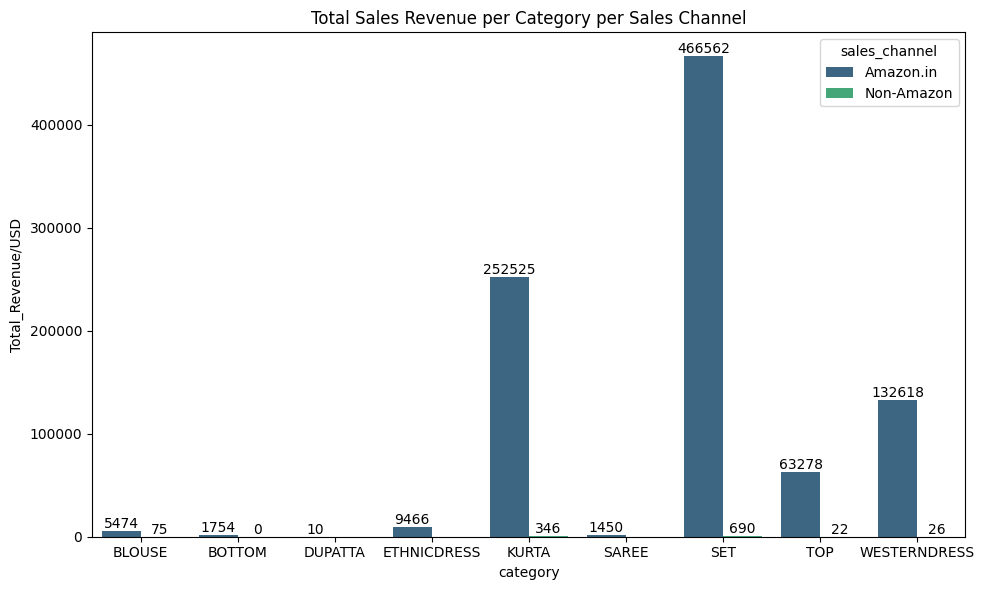

In [154]:
# Visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=total_revenue, x='category', y='Total_Revenue/USD', hue='sales_channel', palette='viridis')

# Annotate each bar in order to show very small amounts
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.title('Total Sales Revenue per Category per Sales Channel')
plt.ylabel('Total_Revenue/USD')
plt.xlabel('category')
plt.legend(title='sales_channel')
plt.tight_layout()
plt.show()

In [155]:
#Merge May2022 AND PLMarch2021
# Merge datasets (df1 and df2 on 'SKU')
merged_MayMarch = pd.merge(cleaned_pLMarch2021,cleaned_May2022, on="sku", how="outer")

# Display the final merged DataFrame
print(merged_MayMarch)
dt = merged_MayMarch.loc[merged_MayMarch['category_x'] != merged_MayMarch['category_y']]
print (dt)
merged_MayMarch = merged_MayMarch.drop(columns='category_y')
merged_MayMarch = merged_MayMarch.rename(columns={'category_x' : 'category'})
print (merged_MayMarch)


                 sku     style_x catalog_x category_x  weight_x    tp1  \
0       OS206_3141_S  OS206_3141   MOMENTS      KURTA       0.3  538.0   
1       OS206_3141_M  OS206_3141   MOMENTS      KURTA       0.3  538.0   
2       OS206_3141_L  OS206_3141   MOMENTS      KURTA       0.3  538.0   
3      OS206_3141_XL  OS206_3141   MOMENTS      KURTA       0.3  538.0   
4     OS206_3141_2XL  OS206_3141   MOMENTS      KURTA       0.3  538.0   
...              ...         ...       ...        ...       ...    ...   
1325         OS326_M       OS326       MIX      KURTA       0.3  467.0   
1326         OS326_L       OS326       MIX      KURTA       0.3  467.0   
1327        OS326_XL       OS326       MIX      KURTA       0.3  467.0   
1328       OS326_2XL       OS326       MIX      KURTA       0.3  467.0   
1329       OS326_3XL       OS326       MIX      KURTA       0.3  467.0   

         tp2  mrp_old_x  final_mrp_old_x  ajio_mrp_x  ...  mrp_old_y  \
0     435.78     2178.0           2295.

In [156]:
# Datasets don't contain Currency column, so as I'm not sure about the currenct of amount,
# so I didn't convert them to USD and I use original values in datasets.

# Calculate total of Price of the product in Ajio MRP
total_ajio_mrp_2021 = merged_MayMarch.groupby(["category"])["ajio_mrp_x"].sum().reset_index()
total_ajio_mrp_2021.columns = ["category", "Total_Ajio_MRP_2021"]
total_ajio_mrp_2022 = merged_MayMarch.groupby(["category"])["ajio_mrp_y"].sum().reset_index()
total_ajio_mrp_2022.columns = ["category", "Total_Ajio_MRP_2022"]

# Calculate total of Price of the product in Amazon MRP
total_amazon_mrp_2021 = merged_MayMarch.groupby(["category"])["amazon_mrp_x"].sum().reset_index()
total_amazon_mrp_2021.columns = ["category", "Total_Amazon_MRP_2021"]
total_amazon_mrp_2022 = merged_MayMarch.groupby(["category"])["amazon_mrp_y"].sum().reset_index()
total_amazon_mrp_2022.columns = ["category", "Total_Amazon_MRP_2022"]

# Calculate total of Price of the product in Amazon FBA MRP
total_amazon_fba_mrp_2021 = merged_MayMarch.groupby(["category"])["amazon_fba_mrp_x"].sum().reset_index()
total_amazon_fba_mrp_2021.columns = ["category", "Total_Amazon_FBA_MRP_2021"]
total_amazon_fba_mrp_2022 = merged_MayMarch.groupby(["category"])["amazon_fba_mrp_y"].sum().reset_index()
total_amazon_fba_mrp_2022.columns = ["category", "Total_Amazon_FBA_MRP_2022"]

# Calculate total of Price of the product in Flipkart MRP
total_flipkart_mrp_2021 = merged_MayMarch.groupby(["category"])["flipkart_mrp_x"].sum().reset_index()
total_flipkart_mrp_2021.columns = ["category", "Total_FlipKart_MRP_2021"]
total_flipkart_mrp_2022 = merged_MayMarch.groupby(["category"])["flipkart_mrp_y"].sum().reset_index()
total_flipkart_mrp_2022.columns = ["category", "Total_FlipKart_MRP_2022"]

# Calculate total of Price of the product in Limeroad MRP
total_limeroad_mrp_2021 = merged_MayMarch.groupby(["category"])["limeroad_mrp_x"].sum().reset_index()
total_limeroad_mrp_2021.columns = ["category", "Total_LimeRoad_MRP_2021"]
total_limeroad_mrp_2022 = merged_MayMarch.groupby(["category"])["limeroad_mrp_y"].sum().reset_index()
total_limeroad_mrp_2022.columns = ["category", "Total_LimeRoad_MRP_2022"]

# Calculate total of Price of the product in Myntra MRP
total_myntra_mrp_2021 = merged_MayMarch.groupby(["category"])["myntra_mrp_x"].sum().reset_index()
total_myntra_mrp_2021.columns = ["category", "Total_Myntra_MRP_2021"]
total_myntra_mrp_2022 = merged_MayMarch.groupby(["category"])["myntra_mrp_y"].sum().reset_index()
total_myntra_mrp_2022.columns = ["category", "Total_Myntra_MRP_2022"]

# Calculate total of Price of the product in Paytm MRP
total_paytm_mrp_2021 = merged_MayMarch.groupby(["category"])["paytm_mrp_x"].sum().reset_index()
total_paytm_mrp_2021.columns = ["category", "Total_Paytm_MRP_2021"]
total_paytm_mrp_2022 = merged_MayMarch.groupby(["category"])["paytm_mrp_y"].sum().reset_index()
total_paytm_mrp_2022.columns = ["category", "Total_Paytm_MRP_2022"]

# Calculate total of Price of the product in Snapdeal MRP
total_snapdeal_mrp_2021 = merged_MayMarch.groupby(["category"])["snapdeal_mrp_x"].sum().reset_index()
total_snapdeal_mrp_2021.columns = ["category", "Total_Snapdeal_MRP_2021"]
total_snapdeal_mrp_2022 = merged_MayMarch.groupby(["category"])["snapdeal_mrp_y"].sum().reset_index()
total_snapdeal_mrp_2022.columns = ["category", "Total_Snapdeal_MRP_2022"]

# Merge totals for better comparison
total_priceOfProducts = (
    total_ajio_mrp_2021
    .merge(total_ajio_mrp_2022, on="category", how="outer")
    .merge(total_amazon_mrp_2021, on="category", how="outer")
    .merge(total_amazon_mrp_2022, on="category", how="outer")
    .merge(total_amazon_fba_mrp_2021, on="category", how="outer")
    .merge(total_amazon_fba_mrp_2022, on="category", how="outer")
    .merge(total_flipkart_mrp_2021, on="category", how="outer")
    .merge(total_flipkart_mrp_2022, on="category", how="outer")
    .merge(total_limeroad_mrp_2021, on="category", how="outer")
    .merge(total_limeroad_mrp_2022, on="category", how="outer")
    .merge(total_myntra_mrp_2021, on="category", how="outer")
    .merge(total_myntra_mrp_2022, on="category", how="outer")
    .merge(total_paytm_mrp_2021, on="category", how="outer")
    .merge(total_paytm_mrp_2022, on="category", how="outer")
    .merge(total_snapdeal_mrp_2021, on="category", how="outer")
    .merge(total_snapdeal_mrp_2022, on="category", how="outer")
)
print(total_priceOfProducts)

   category  Total_Ajio_MRP_2021  Total_Ajio_MRP_2022  Total_Amazon_MRP_2021  \
0      GOWN            100840.00            100840.00              100840.00   
1     KURTA           1594780.00           1594780.00             1607380.00   
2  KURTASET            949276.00            949276.00              944608.00   
3      TOPS             78775.00             78775.00               78775.00   
4   UNKNOWN            174283.45            174283.45              174788.45   

   Total_Amazon_MRP_2022  Total_Amazon_FBA_MRP_2021  \
0              100840.00                  100840.00   
1             1607380.00                 1607380.00   
2              944608.00                  944608.00   
3               78775.00                   78775.00   
4              174788.45                  174788.45   

   Total_Amazon_FBA_MRP_2022  Total_FlipKart_MRP_2021  \
0                  100840.00                100840.00   
1                 1607380.00               1602480.00   
2                

C:\Users\Zahra\AppData\Local\Temp\ipykernel_5696\2535334166.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=melted_data, x='category', y='Total_MRP', hue='Platform', ci=None, palette='viridis')


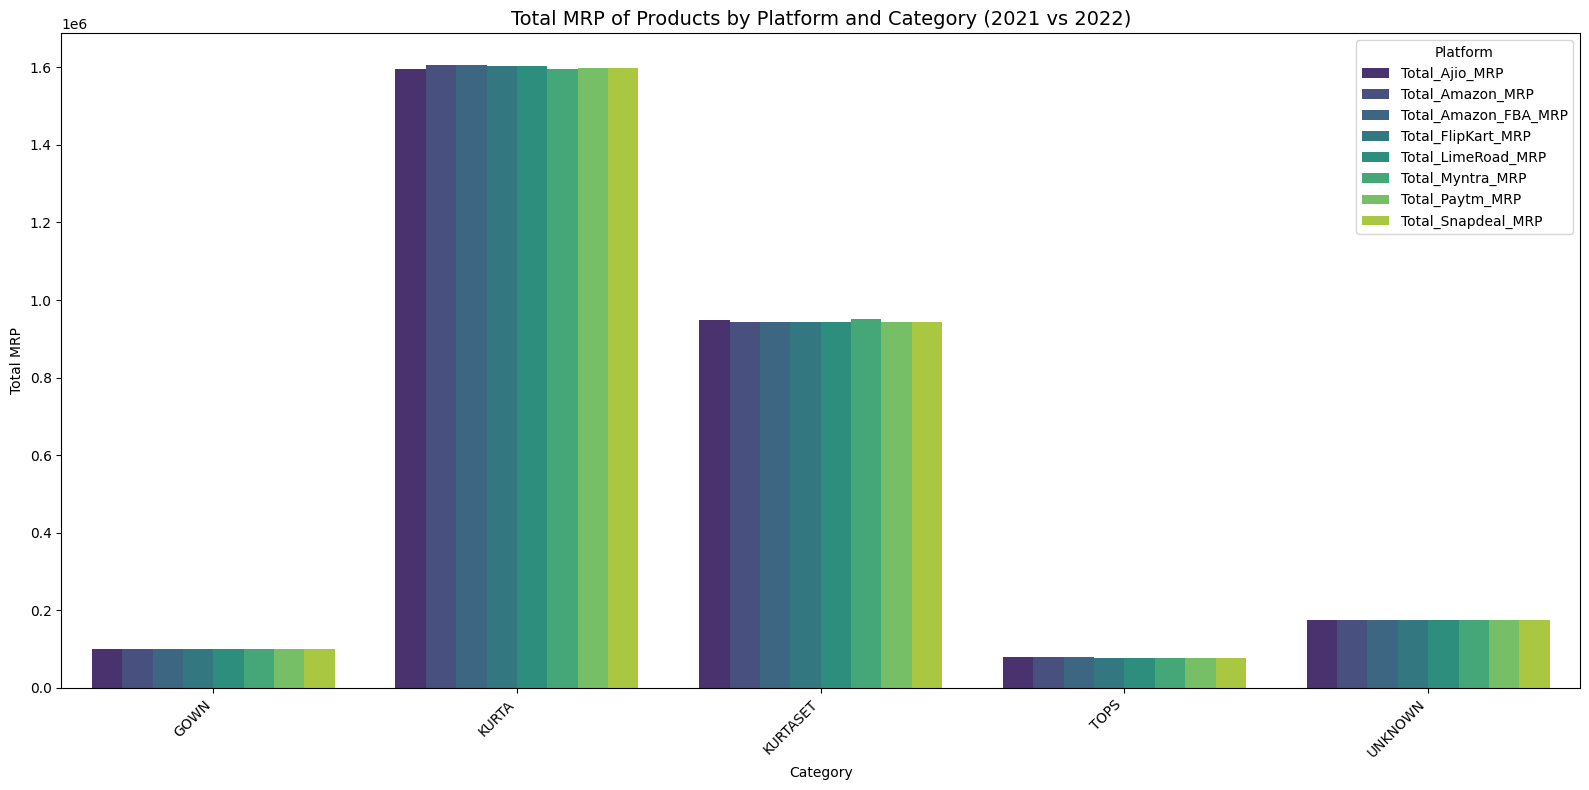

In [157]:
# Prepare the data for visualization
melted_data = total_priceOfProducts.melt(
    id_vars=["category"],
    var_name="Platform_Year",
    value_name="Total_MRP"
)

# Split 'Platform_Year' into 'Platform' and 'Year' for better grouping
melted_data[['Platform', 'Year']] = melted_data['Platform_Year'].str.rsplit('_', n=1, expand=True)

plt.figure(figsize=(16, 8))
sns.barplot(data=melted_data, x='category', y='Total_MRP', hue='Platform', ci=None, palette='viridis')

plt.title('Total MRP of Products by Platform and Category (2021 vs 2022)', fontsize=14)
plt.ylabel('Total MRP')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


In [158]:
#Merge Amazon Sale Report With Internation Sale Report In Order to Find Category of each sale in internationl
merged_internationalSaleReport = pd.merge(cleaned_internationalSaleReport,cleaned_saleReport, on=["sku","size"], how="left")

string_columns = ['category']

# Apply cleaning string columns function to all relevant columns
for col in string_columns:
    merged_internationalSaleReport[f'{col}'] = clean_string_column(merged_internationalSaleReport[col])
# Display the final merged DataFrame
print(merged_internationalSaleReport)

            date  months           customer     style              sku  \
0     2021-06-05  21-Jun  REVATHYLOGANATHAN   MEN5004     MEN5004-KR-L   
1     2021-06-05  21-Jun  REVATHYLOGANATHAN   MEN5004    MEN5004-KR-XL   
2     2021-06-05  21-Jun  REVATHYLOGANATHAN   MEN5004   MEN5004-KR-XXL   
3     2021-06-05  21-Jun  REVATHYLOGANATHAN   MEN5009     MEN5009-KR-L   
4     2021-06-05  21-Jun  REVATHYLOGANATHAN   MEN5011     MEN5011-KR-L   
...          ...     ...                ...       ...              ...   
25758 2022-03-31  22-Mar               AVIN    SET276   SET276-KR-PP-L   
25759 2022-03-31  22-Mar               AVIN  PJNE3423  PJNE3423-KR-4XL   
25760 2022-03-31  22-Mar               AVIN  PJNE3404  PJNE3404-KR-4XL   
25761 2022-03-31  22-Mar               AVIN    SET290  SET290-KR-DPT-M   
25762 2022-03-31  22-Mar               AVIN  SHIPPING         SHIPPING   

          size  pcs     rate  grossAmount  stock_x designNo  stock_y category  \
0            L  1.0   616.56  

In [159]:

# Calculate Total Amount of Sale for Each Category In International Sales
total_revenue_international = merged_internationalSaleReport.groupby(["category"])["grossAmount"].sum().reset_index()
total_revenue_international.columns = ["category", "Total_Revenue_International"]
print(total_revenue_international)

             category  Total_Revenue_International
0         AN:LEGGINGS                     10513.00
1              BLOUSE                    307083.00
2            CARDIGAN                    128847.50
3             CROPTOP                      8103.00
4   CROPTOPWITHPLAZZO                      1776.00
5               DRESS                    639276.00
6            JUMPSUIT                       664.00
7               KURTA                   3639882.00
8            KURTASET                   3519889.50
9        LEHENGACHOLI                     49441.00
10          NIGHTWEAR                     52623.00
11            PALAZZO                    116824.00
12               PANT                    117872.00
13              SAREE                     18632.00
14                SET                    831992.50
15                TOP                   1139617.50
16              TUNIC                    237445.00
17            UNKNOWN                  12903418.58


C:\Users\Zahra\AppData\Local\Temp\ipykernel_5696\151379203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(  # Capture the axis object


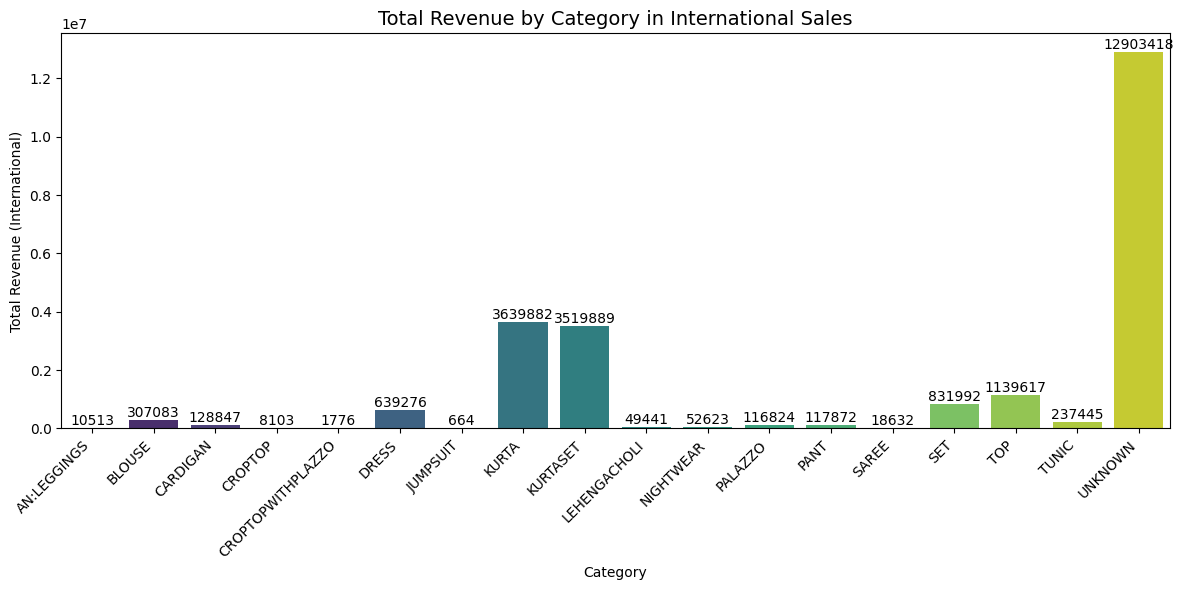

In [160]:
# Visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(  # Capture the axis object
    data=total_revenue_international, 
    x='category', 
    y='Total_Revenue_International', 
    palette='viridis'
)

# Annotate each bar to show even very small amounts
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Total Revenue by Category in International Sales', fontsize=14)
plt.ylabel('Total Revenue (International)')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [161]:
# 2. Sales channel with most income for each category.
# For this question, I also should get data from different datasets separately, because the reason that I said about last question.
# Group by 'Category' and 'Sales_Channel' and sum the income (Amazon Sales Report) here I just calculate for USD
most_income = cleaned_amazonSaleReport.groupby(['category', 'sales_channel'])['amount_in_USD'].sum().reset_index()

# Find the Sales_Channel with the most income for each Category
result = most_income.loc[most_income.groupby('category')['amount_in_USD'].idxmax()]

print(result)

        category sales_channel  amount_in_USD
0         BLOUSE     Amazon.in    5474.079189
2         BOTTOM     Amazon.in    1754.605567
4        DUPATTA     Amazon.in      10.655642
5    ETHNICDRESS     Amazon.in    9466.526843
6          KURTA     Amazon.in  252525.930360
8          SAREE     Amazon.in    1450.492139
9            SET     Amazon.in  466562.117503
11           TOP     Amazon.in   63278.832538
13  WESTERNDRESS     Amazon.in  132618.466170


In [162]:
# For May March Merged
# Melt the DataFrame to long format
melted_merged_MayMarch = merged_MayMarch.melt(
    id_vars=['category'], 
    value_vars=['ajio_mrp_x', 'ajio_mrp_y','amazon_mrp_x', 'amazon_mrp_y','amazon_fba_mrp_x','amazon_fba_mrp_y',
                 'flipkart_mrp_x', 'flipkart_mrp_y' , 'limeroad_mrp_x' , 'limeroad_mrp_y' , 'myntra_mrp_x' , 'myntra_mrp_y',
                 'paytm_mrp_x' , 'paytm_mrp_y' , 'snapdeal_mrp_x' , 'snapdeal_mrp_y'],
    var_name='Sales_Channel',
    value_name='Total_Price'
)

# Group by Category and Sales_Channel, and calculate the sum
grouped = melted_merged_MayMarch.groupby(['category', 'Sales_Channel'], as_index=False)['Total_Price'].sum()

# Check if all sales channels have the same sum for each category
grouped_by_category = grouped.groupby('category')['Total_Price']

# List categories where all sums are the same
results = {}
for category, totalPrices in grouped_by_category:
    if totalPrices.nunique() == 1:
        total_sum = totalPrices.iloc[0]  
        results[category] = f"All are the same: {total_sum}"
    else:
        # Find the sales channel with the most income
        top_channel = grouped[grouped['category'] == category].sort_values(by='Total_Price', ascending=False).iloc[0]
        results[category] = f"{top_channel['Sales_Channel']} has the most income: {top_channel['Total_Price']}"

for category, result in results.items():
    print(f"Category '{category}': {result}")

Category 'GOWN': All are the same: 100840.0
Category 'KURTA': amazon_fba_mrp_x has the most income: 1607380.0
Category 'KURTASET': myntra_mrp_x has the most income: 951154.0
Category 'TOPS': ajio_mrp_x has the most income: 78775.0
Category 'UNKNOWN': amazon_fba_mrp_x has the most income: 174788.45


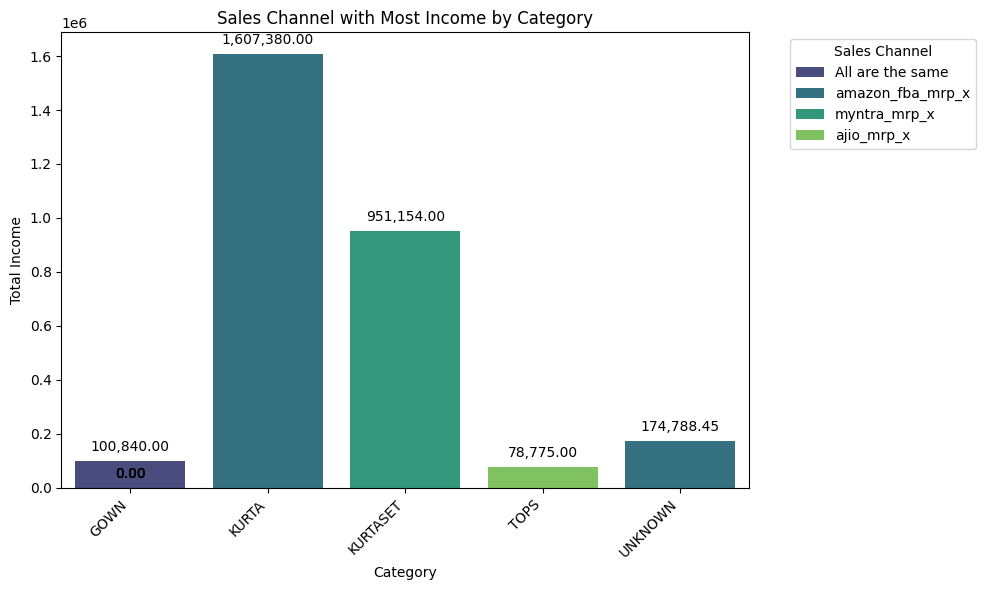

In [163]:
# Assuming 'grouped' is the DataFrame with the grouped and summed data
# Extract the top channel for each category based on your results
top_channels_data = []

for category, totalPrices in grouped_by_category:
    if totalPrices.nunique() == 1:
        total_sum = totalPrices.iloc[0]
        top_channels_data.append({'category': category, 'sales_channel': 'All are the same', 'total_income': total_sum})
    else:
        top_channel = grouped[grouped['category'] == category].sort_values(by='Total_Price', ascending=False).iloc[0]
        top_channels_data.append({
            'category': category,
            'sales_channel': top_channel['Sales_Channel'],
            'total_income': top_channel['Total_Price']
        })

# Create DataFrame from top channels data
top_channels_df = pd.DataFrame(top_channels_data)

# Plot the results using a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_channels_df, x='category', y='total_income', hue='sales_channel', palette='viridis')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5),
                textcoords='offset points', 
                ha='center', 
                va='bottom', 
                fontsize=10, color='black')

plt.title('Sales Channel with Most Income by Category')
plt.xlabel('Category')
plt.ylabel('Total Income')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sales Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [164]:
# 3. Top and bottom 5 cities, and regions, based on the amount of delivery regardless of product type.
# For this part, the only dataset which contains related data is Amazon Sale Report, So it's easy :)
# As the Qty is 

# Filter the data by multiple statuses
filtered_status = ["SHIPPED-DELIVEREDTOBUYER", "SHIPPED-PICKEDUP"]  # Specify the desired status values
filtered_df = cleaned_amazonSaleReport[cleaned_amazonSaleReport['status'].isin(filtered_status)]

# Group by City and count the number of unique orders( As the value for Qty is Zero in some rows, so I decided to count the orders which delivered)
city_counts = filtered_df.groupby('ship_city', as_index=False)['order_id'].count()

# Sort the cities by order count
city_counts_sorted = city_counts.sort_values(by='order_id', ascending=False)

# Top and bottom 5 cities
top_5_cities = city_counts_sorted.head(5)
bottom_5_cities = city_counts_sorted.tail(5)

# Group by Region and count the number of unique orders( As the value for Qty is Zero in some rows, so I decided to count the orders which delivered)
region_counts = filtered_df.groupby('ship_state', as_index=False)['order_id'].count()

# Sort the regions by order count
region_counts_sorted = region_counts.sort_values(by='order_id', ascending=False)

# Top and bottom 5 regions
top_5_regions = region_counts_sorted.head(5)
bottom_5_regions = region_counts_sorted.tail(5)

# Print results
print(f"Top 5 Cities for {filtered_status}:")
print(top_5_cities)
print("\nBottom 5 Cities:")
print(bottom_5_cities)

print(f"\nTop 5 Regions for {filtered_status}:")
print(top_5_regions)
print("\nBottom 5 Regions:")
print(bottom_5_regions)

Top 5 Cities for ['SHIPPED-DELIVEREDTOBUYER', 'SHIPPED-PICKEDUP']:
      ship_city  order_id
364   BENGALURU      2522
1171  HYDERABAD      1947
2028     MUMBAI      1660
2227   NEWDELHI      1484
598     CHENNAI      1328

Bottom 5 Cities:
            ship_city  order_id
1519          KHARDAH         1
1523          KHARIAR         1
1524           KHAROD         1
1525         KHARSANG         1
1700  KURLAEASTMUMBAI         1

Top 5 Regions for ['SHIPPED-DELIVEREDTOBUYER', 'SHIPPED-PICKEDUP']:
      ship_state  order_id
20   MAHARASHTRA      5075
15     KARNATAKA      3720
39  UTTARPRADESH      2520
34     TAMILNADU      2498
35     TELANGANA      2485

Bottom 5 Regions:
                ship_state  order_id
17                  LADAKH         6
32                      RJ         2
27                  ORISSA         2
18             LAKSHADWEEP         2
30  PUNJAB/MOHALI/ZIRAKPUR         1


C:\Users\Zahra\AppData\Local\Temp\ipykernel_5696\841604540.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bottom_cities, x='ship_city', y='order_id', palette='coolwarm')


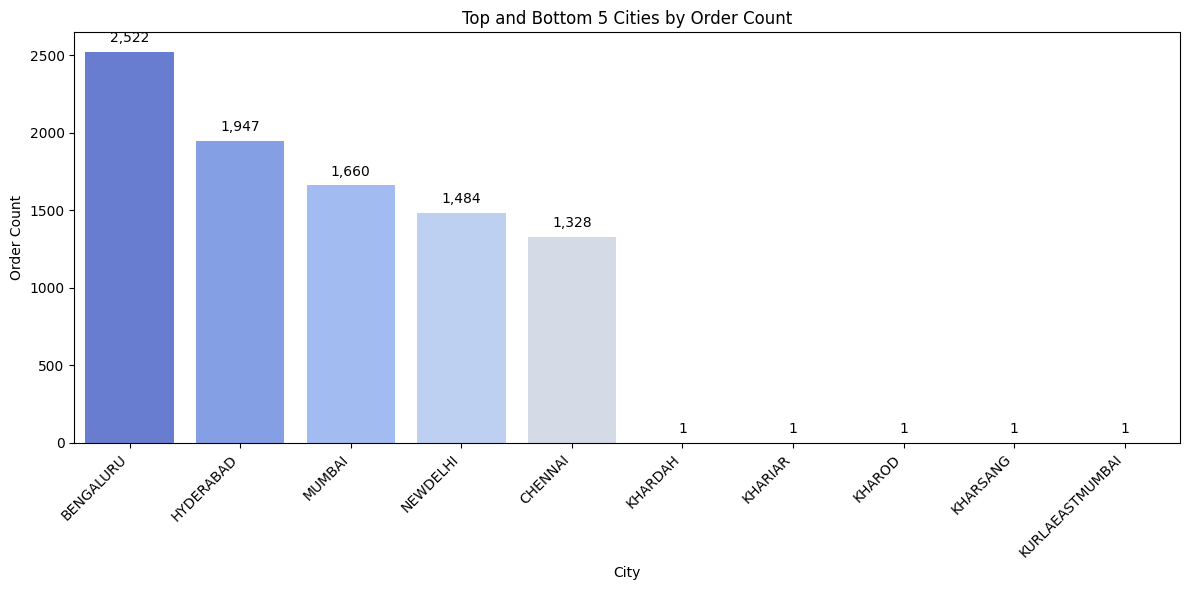

C:\Users\Zahra\AppData\Local\Temp\ipykernel_5696\841604540.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bottom_regions, x='ship_state', y='order_id', palette='coolwarm')


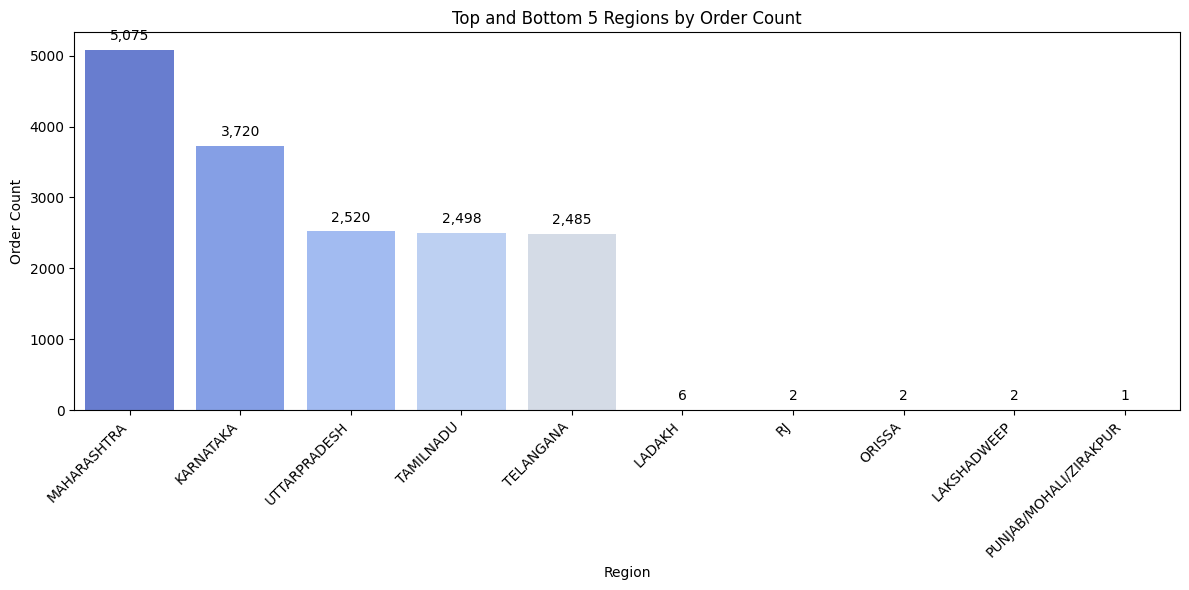

In [165]:
# Top and Bottom 5 Cities
plt.figure(figsize=(12, 6))

# Combine the Top and Bottom cities into one DataFrame for plotting
top_bottom_cities = pd.concat([top_5_cities, bottom_5_cities])

# Plot the barplot for cities
sns.barplot(data=top_bottom_cities, x='ship_city', y='order_id', palette='coolwarm')

# Add value labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       xytext=(0, 5),  # offset label slightly above the bar
                       textcoords='offset points', 
                       ha='center', 
                       va='bottom', 
                       fontsize=10, color='black')

plt.title('Top and Bottom 5 Cities by Order Count')
plt.xlabel('City')
plt.ylabel('Order Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top and Bottom 5 Regions
plt.figure(figsize=(12, 6))

# Combine the Top and Bottom regions into one DataFrame for plotting
top_bottom_regions = pd.concat([top_5_regions, bottom_5_regions])

# Plot the barplot for regions
sns.barplot(data=top_bottom_regions, x='ship_state', y='order_id', palette='coolwarm')

# Add value labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       xytext=(0, 5),
                       textcoords='offset points', 
                       ha='center', 
                       va='bottom', 
                       fontsize=10, color='black')

plt.title('Top and Bottom 5 Regions by Order Count')
plt.xlabel('Region')
plt.ylabel('Order Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Copy All Results into SQL Tables, in order to connect them to Power BI

In [166]:
connection_string = quote_plus(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost;"
    "DATABASE=Ecommerce_DB;"
    "Trusted_Connection=yes;"
)

engine = sqlalchemy.create_engine(f"mssql+pyodbc:///?odbc_connect={connection_string}")

# Write DataFrames to SQL tables
# Question 1
table_name = 'tbl_TotalRevenuePerCategory'
total_revenue.to_sql(table_name, con=engine, if_exists='replace', index=False)
print(f"Data successfully written to SQL table '{table_name}'")

# Question 2
table_name = 'tbl_MostIncomeSaleChannel'
total_priceOfProducts.to_sql(table_name, con=engine, if_exists='replace', index=False)
print(f"Data successfully written to SQL table '{table_name}'")

# Question 3
table_name = 'tbl_CityCountsDeliveries'
city_counts_sorted.to_sql(table_name, con=engine, if_exists='replace', index=False)
print(f"Data successfully written to SQL table '{table_name}'")

table_name = 'tbl_RegionCountsDeliveries'
region_counts_sorted.to_sql(table_name, con=engine, if_exists='replace', index=False)
print(f"Data successfully written to SQL table '{table_name}'")


Data successfully written to SQL table 'tbl_TotalRevenuePerCategory'
Data successfully written to SQL table 'tbl_MostIncomeSaleChannel'
Data successfully written to SQL table 'tbl_CityCountsDeliveries'
Data successfully written to SQL table 'tbl_RegionCountsDeliveries'


# I Found Interesting these Visualises

# 1 - Products Which Ordered Together different times 

In [167]:
from itertools import combinations
from collections import Counter

# Create a new column to combine SKU and Category
cleaned_amazonSaleReport['Product_Category'] = cleaned_amazonSaleReport['sku'] + ' (' + cleaned_amazonSaleReport['category'] + ')'

# Group products by Order ID into lists
grouped_products = cleaned_amazonSaleReport.groupby('order_id')['Product_Category'].apply(list)

# Generate combinations of products (pairs)
product_combinations = []
for products in grouped_products:
    # Create all possible pairs from the list of products in each order
    product_combinations.extend(combinations(products, 2))

# Count how many times each pair appears
combination_counts = Counter(product_combinations)

# Convert the counts into a DataFrame
result = pd.DataFrame(combination_counts.items(), columns=['Product Combination', 'Count'])

# Sort the results by count in descending order
result = result.sort_values(by='Count', ascending=False)

# Show the top 10 results
print(result.head(10))


                                    Product Combination  Count
1814     (SET264-KR-NP-XL (SET), SET268-KR-NP-XL (SET))      6
1289     (SET268-KR-NP-XL (SET), SET264-KR-NP-XL (SET))      6
254   (PJNE3291-KR-6XL (KURTA), PJNE3252-KR-N-6XL (K...      5
3218     (SET397-KR-NP-XS (SET), JNE3543-KR-XS (KURTA))      5
6340  (JNE3800-KR-S (WESTERNDRESS), JNE3801-KR-S (KU...      4
666   (JNE3800-KR-L (WESTERNDRESS), JNE3797-KR-L (WE...      4
2167   (JNE3780-KR-XXL (KURTA), JNE3784-KR-XXL (KURTA))      4
4067       (SET345-KR-NP-M (SET), SET331-KR-NP-M (SET))      4
1139       (JNE3543-KR-S (KURTA), SET397-KR-NP-S (SET))      4
222   (JNE3801-KR-L (KURTA), JNE3797-KR-L (WESTERNDR...      4


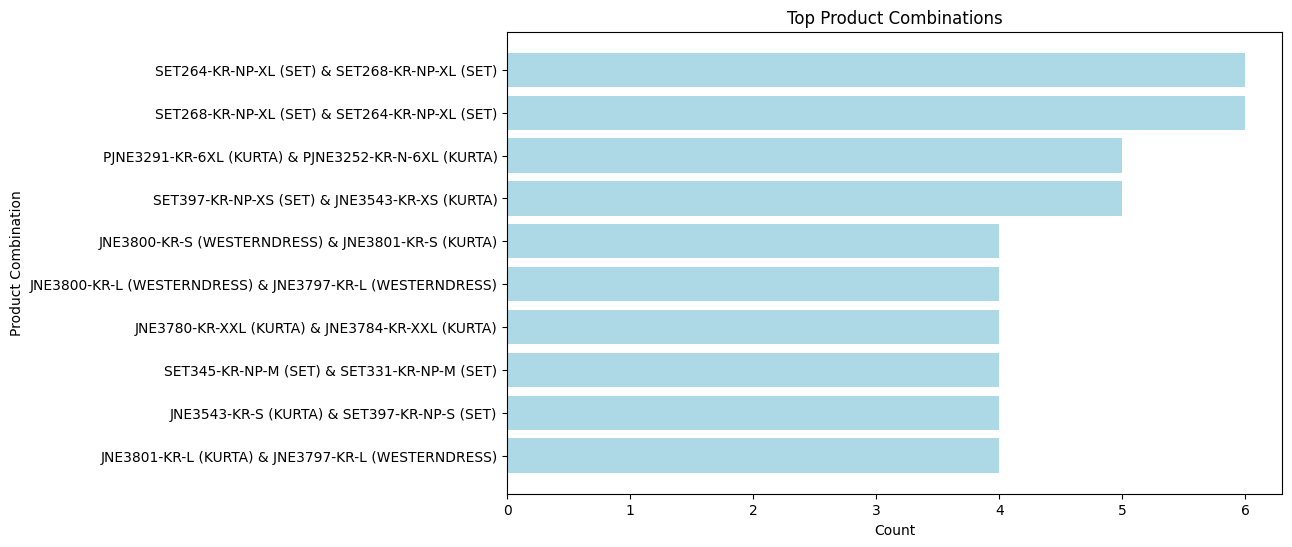

In [168]:
import matplotlib.pyplot as plt

# Take the top 10 combinations
top_combinations = result.head(10)

# Prepare labels for the chart
labels = [' & '.join(comb) for comb in top_combinations['Product Combination']]

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(labels, top_combinations['Count'], color='lightblue')
plt.xlabel('Count')
plt.ylabel('Product Combination')
plt.title('Top Product Combinations')
plt.gca().invert_yaxis()  # Flip the chart to show the highest count at the top
plt.show()


# 2- Count of orders based on Status

In [169]:
# Count the number of orders for each status
status_counts = cleaned_amazonSaleReport['status'].value_counts()

# Convert the result to a DataFrame for better readability
status_counts_df = status_counts.reset_index()
status_counts_df.columns = ['Status', 'Count']

# Show the counts for each status
print(status_counts_df)


                       Status  Count
0                     SHIPPED  77801
1    SHIPPED-DELIVEREDTOBUYER  28769
2                   CANCELLED  18329
3    SHIPPED-RETURNEDTOSELLER   1953
4            SHIPPED-PICKEDUP    973
5                     PENDING    658
6    PENDING-WAITINGFORPICKUP    281
7   SHIPPED-RETURNINGTOSELLER    145
8      SHIPPED-OUTFORDELIVERY     35
9     SHIPPED-REJECTEDBYBUYER     11
10                   SHIPPING      8
11      SHIPPED-LOSTINTRANSIT      5
12            SHIPPED-DAMAGED      1
13                    UNKNOWN      1


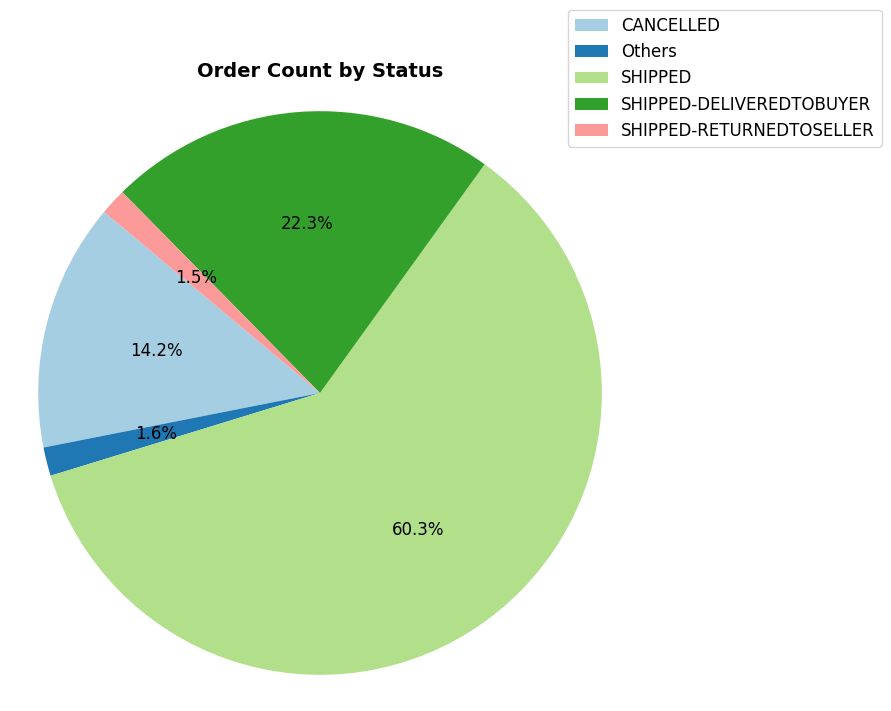

In [170]:
status_counts_df.columns = ['Status', 'Count']

# Set a threshold for small values, combine them into 'Others'
threshold = 1000
status_counts_df['Status'] = status_counts_df.apply(
    lambda x: 'Others' if x['Count'] < threshold else x['Status'], axis=1
)

# Grouping small values under 'Others'
order_counts_grouped = status_counts_df.groupby('Status').agg({'Count': 'sum'}).reset_index()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
# Pie chart with percentage and legend
plt.pie(order_counts_grouped['Count'], autopct='%1.1f%%', startangle=140,
        colors=plt.cm.Paired.colors, textprops={'fontsize': 12})

plt.title('Order Count by Status',fontweight = 'bold' ,loc='center',fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

plt.legend(order_counts_grouped['Status'], loc=(0.9,0.9), fontsize=12)

plt.show()

# Count of B2B Orders and Non B2B Orders

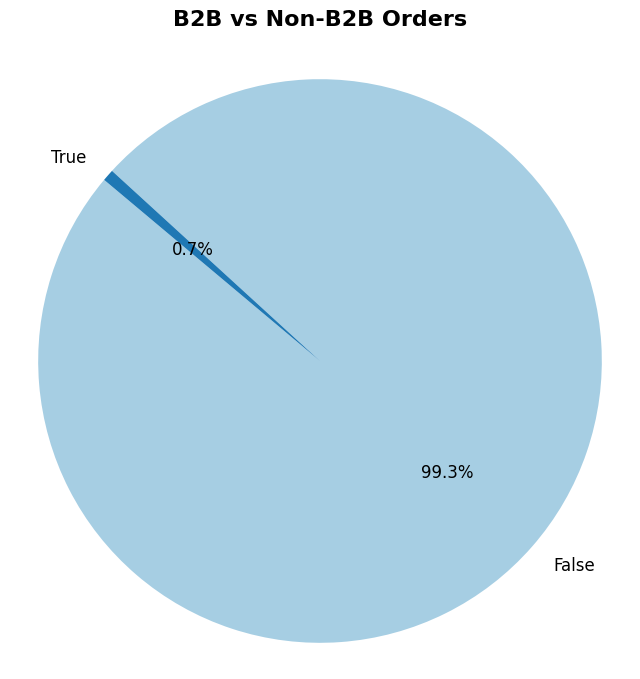

In [171]:
b2b_counts = cleaned_amazonSaleReport['b2b'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(b2b_counts, labels=b2b_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, textprops={'fontsize': 12})

plt.title('B2B vs Non-B2B Orders', fontsize=16, fontweight='bold', loc='center', pad=20)

plt.axis('equal')

plt.show()

# Finding 10 Top Category+size+colors which are more poular in India according to amazon sale report

C:\Users\Zahra\AppData\Local\Temp\ipykernel_5696\1034434556.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='qty', y='Category_Size_Color', data=top_10_popular, palette='viridis')


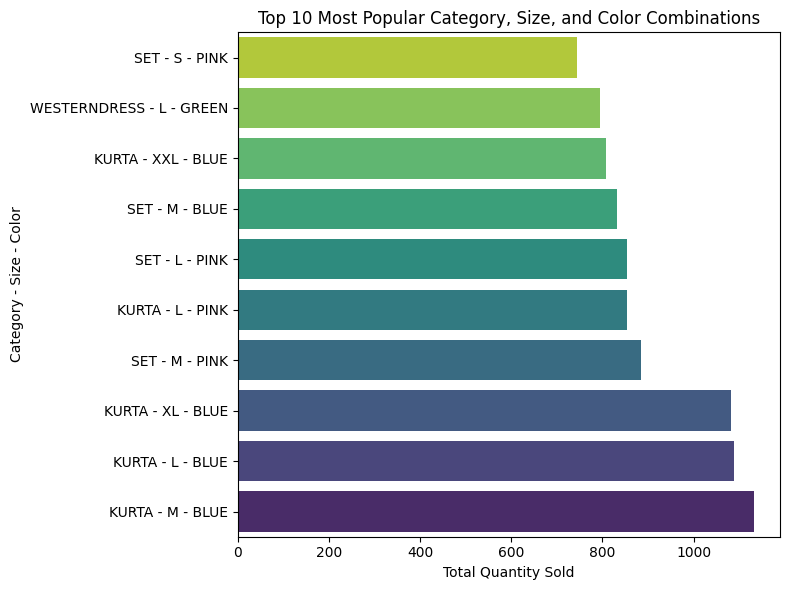

In [172]:
# Merging and grouping data
merged_data = pd.merge(cleaned_amazonSaleReport, cleaned_saleReport, how='inner', left_on='sku', right_on='sku')
category_size_color_qty = merged_data.groupby(['category_x', 'size_x', 'color'])['qty'].sum().reset_index()
top_10_popular = category_size_color_qty.sort_values(by='qty', ascending=False).head(10)
top_10_popular['Category_Size_Color'] = top_10_popular['category_x'] + ' - ' + top_10_popular['size_x'] + ' - ' + top_10_popular['color']

plt.figure(figsize=(8,6))

sns.barplot(x='qty', y='Category_Size_Color', data=top_10_popular, palette='viridis')

plt.xlabel('Total Quantity Sold')
plt.ylabel('Category - Size - Color')
plt.title('Top 10 Most Popular Category, Size, and Color Combinations')

plt.ylim(-0.5, len(top_10_popular) - 0.5)

plt.tight_layout()

plt.show()
